## Notebook for making plots for Snowball Earth Modern Continents
### This notebook plots figures 2 and 3 from the JGR submission
### originally from Greta Shum, edited by Abby Swann
#### using NCAR's NPL 2023a python environment
### Nov 2025

In [1]:
# Python comments are done with the # symbol

# I/O
# to make plots show up below each code cell:
%matplotlib inline
import math
import time
import warnings
from datetime import date, timedelta

from copy import copy

# nice maps:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cftime
import cmocean as cm
import intake
import IPython.core.display as di  # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)
# Plotting
# basic plotting ability:
import matplotlib as mpl
import matplotlib.cbook as cbook
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import netCDF4 as nc
# numpy is basically matlab for python. It is math tools.
import numpy as np
import numpy.ma as ma
import numpy.matlib
import pandas as pd
import seaborn as sns

# xarray is for dealing with netcdf files.
import xarray as xr
from datetime import timedelta
from cftime import DatetimeNoLeap


from cartopy.util import add_cyclic_point
# from cmcrameri import cm # removed by alss
# we may not need this anymore...
from IPython.display import HTML, display
from matplotlib import cm
# from numpy import NaN, nanmean, nanmedian
import bokeh.palettes
from matplotlib import colors
import matplotlib.ticker as mticker
from matplotlib.ticker import MaxNLocator
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.colors as colors 

from matplotlib.patches import ConnectionPatch
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

from matplotlib.gridspec import GridSpec
import string

warnings.filterwarnings('ignore')


# used to use this for maps, have switched to cartopy now, but I'll leave it here in case we want to try it also
#from mpl_toolkits.basemap import Basemap, cm

In [2]:
import warnings

warnings.filterwarnings('ignore')

## Run information

In [3]:
# Make dictionary for run names

run_name = {}
run_name = {
    'moderncam4b_010p10p30a' : '10 ppm, 0.1/0.3 albedo',
    'moderncam4b_010p20p40a' : '10 ppm, 0.2/0.4 albedo',
    'moderncam4b_010p30p50a' : '10 ppm, 0.3/0.5 albedo',

    'moderncam4b_025p20p40a' : '25 ppm, 0.2/0.4 albedo',

    'moderncam4b_050p10p30a' : '50 ppm, 0.1/0.3 albedo',
    'moderncam4b_050p15p35a' : '50 ppm, 0.15/0.35 albedo',
    'moderncam4b_050p20p40a' : '50 ppm, 0.2/0.4 albedo',
    'moderncam4b_050p25p45a' : '50 ppm, 0.25/0.45 albedo',
    'moderncam4b_050p30p50a' : '50 ppm, 0.3/0.5 albedo',

    'moderncam4b_100p20p40a' : '100 ppm, 0.2/0.4 albedo',
    'moderncam4b_100p30p50a' : '100 ppm, 0.3/0.5 albedo',

    'moderncam4b_200p10p30a' : '200 ppm, 0.1/0.3 albedo',
    'moderncam4b_200p20p40a' : '200 ppm, 0.2/0.4 albedo',
    'moderncam4b_200p30p50a' : '200 ppm, 0.3/0.5 albedo',
}

In [4]:
# Make dictionary for run names

run_longname = {}
run_longname = {
    'moderncam4b_010p10p30a' : '10 ppm CO$_2$, 0.1/0.3 bare-land albedo',
    'moderncam4b_010p20p40a' : '10 ppm CO$_2$, 0.2/0.4 bare-land albedo',
    'moderncam4b_010p30p50a' : '10 ppm CO$_2$, 0.3/0.5 bare-land albedo',

    'moderncam4b_025p20p40a' : '25 ppm CO$_2$, 0.2/0.4 bare-land albedo',

    'moderncam4b_050p10p30a' : '50 ppm CO$_2$, 0.1/0.3 bare-land albedo',
    'moderncam4b_050p15p35a' : '50 ppm CO$_2$, 0.15/0.35 bare-land albedo',
    'moderncam4b_050p20p40a' : '50 ppm CO$_2$, 0.2/0.4 bare-land albedo',
    'moderncam4b_050p25p45a' : '50 ppm CO$_2$, 0.25/0.45 bare-land albedo',
    'moderncam4b_050p30p50a' : '50 ppm CO$_2$, 0.3/0.5 bare-land albedo',

    'moderncam4b_100p20p40a' : '100 ppm CO$_2$, 0.2/0.4 bare-land albedo',
    'moderncam4b_100p30p50a' : '100 ppm CO$_2$, 0.3/0.5 bare-land albedo',

    'moderncam4b_200p10p30a' : '200 ppm CO$_2$, 0.1/0.3 bare-land albedo',
    'moderncam4b_200p20p40a' : '200 ppm CO$_2$, 0.2/0.4 bare-land albedo',
    'moderncam4b_200p30p50a' : '200 ppm CO$_2$, 0.3/0.5 bare-land albedo',
}

In [5]:
co2_colorlist = ['#99d8c9', '#66c2a4', '#41ae76', '#238b45','#005824']
alb_colorlist = ['#fdbe85', '#fd8d3c', '#d94701']

alb_color_dict = {0.3 :'#FFE47E',
                  0.25: '#FFCB72',
                  0.2: '#FFA553',
                  0.15: '#E06D23',
                  0.1: '#D94701'}
co2_color_dict = {10: '#99d8c9',
                  25: '#66c2a4',
                  50: '#41ae76',
                  100: '#238b45',
                  200: '#005824'}



In [6]:
# Make dictionary for runlist

runlist = [
    'moderncam4b_010p10p30a',
    'moderncam4b_010p20p40a',
    'moderncam4b_010p30p50a',
    'moderncam4b_025p20p40a',
    'moderncam4b_050p10p30a',
    'moderncam4b_050p15p35a',
    'moderncam4b_050p20p40a',
    'moderncam4b_050p25p45a',
    'moderncam4b_050p30p50a',
    'moderncam4b_100p20p40a',
    # 'moderncam4b_100p30p50a',
    'moderncam4b_200p10p30a',
    'moderncam4b_200p20p40a',
    'moderncam4b_200p30p50a',
]

In [7]:
# Make dicitonary for albedo and co2 labels

label_alb = {
    0.3 : '0.3/0.5',
    0.2 : '0.2/0.4',
    0.1 : '0.1/0.2',
}
label_co2 = {
    10 : '10 ppm',
    50 : '50 ppm',
    200 : '200 ppm'
}

## Define functions and constants

In [8]:
# constants

mmperm = 1000
sperday = 86400
gperkg = 1000


In [9]:
'''def area_grid(lat, lon):
    """
    Calculate the area of each grid cell
    Area is in square meters
    
    Input
    -----------
    lat: vector of latitude in degrees
    lon: vector of longitude in degrees
    
    Output
    -----------
    area: grid-cell area in square-meters with dimensions, [lat,lon]
    
    Notes
    -----------
    Based on the function in
    https://github.com/chadagreene/CDT/blob/master/cdt/cdtarea.m
    """
    from numpy import cos, deg2rad, gradient, meshgrid
    from xarray import DataArray

    xlon, ylat = meshgrid(lon, lat)
    R = earth_radius(ylat)

    dlat = deg2rad(gradient(ylat, axis=0))
    dlon = deg2rad(gradient(xlon, axis=1))

    dy = dlat * R
    dx = dlon * R * cos(deg2rad(ylat))

    area = dy * dx

    xda = DataArray(
        area,
        dims=["lat", "lon"],
        coords={"lat": lat, "lon": lon},
        attrs={
            "long_name": "area_per_pixel",
            "description": "area per pixel",
            "units": "m^2",
        },
    )
    return xda'''

'def area_grid(lat, lon):\n    """\n    Calculate the area of each grid cell\n    Area is in square meters\n    \n    Input\n    -----------\n    lat: vector of latitude in degrees\n    lon: vector of longitude in degrees\n    \n    Output\n    -----------\n    area: grid-cell area in square-meters with dimensions, [lat,lon]\n    \n    Notes\n    -----------\n    Based on the function in\n    https://github.com/chadagreene/CDT/blob/master/cdt/cdtarea.m\n    """\n    from numpy import cos, deg2rad, gradient, meshgrid\n    from xarray import DataArray\n\n    xlon, ylat = meshgrid(lon, lat)\n    R = earth_radius(ylat)\n\n    dlat = deg2rad(gradient(ylat, axis=0))\n    dlon = deg2rad(gradient(xlon, axis=1))\n\n    dy = dlat * R\n    dx = dlon * R * cos(deg2rad(ylat))\n\n    area = dy * dx\n\n    xda = DataArray(\n        area,\n        dims=["lat", "lon"],\n        coords={"lat": lat, "lon": lon},\n        attrs={\n            "long_name": "area_per_pixel",\n            "description": "are

In [10]:
'''def earth_radius(lat):
'''    '''
    calculate radius of Earth assuming oblate spheroid
    defined by WGS84
    
    Input
    ---------
    lat: vector or latitudes in degrees  
    
    Output
    ----------
    r: vector of radius in meters
    
    Notes
    -----------
    WGS84: https://earth-info.nga.mil/GandG/publications/tr8350.2/tr8350.2-a/Chapter%203.pdf
    '''
'''    from numpy import cos, deg2rad, sin

    # define oblate spheroid from WGS84
    a = 6378137
    b = 6356752.3142
    e2 = 1 - (b**2/a**2)
    
    # convert from geodecic to geocentric
    # see equation 3-110 in WGS84
    lat = deg2rad(lat)
    lat_gc = np.arctan( (1-e2)*np.tan(lat) )

    # radius equation
    # see equation 3-107 in WGS84
    r = (
        (a * (1 - e2)**0.5) 
         / (1 - (e2 * np.cos(lat_gc)**2))**0.5 
        )

    return r'''

'    from numpy import cos, deg2rad, sin\n\n    # define oblate spheroid from WGS84\n    a = 6378137\n    b = 6356752.3142\n    e2 = 1 - (b**2/a**2)\n    \n    # convert from geodecic to geocentric\n    # see equation 3-110 in WGS84\n    lat = deg2rad(lat)\n    lat_gc = np.arctan( (1-e2)*np.tan(lat) )\n\n    # radius equation\n    # see equation 3-107 in WGS84\n    r = (\n        (a * (1 - e2)**0.5) \n         / (1 - (e2 * np.cos(lat_gc)**2))**0.5 \n        )\n\n    return r'

In [11]:
'''def NEflux(ds_in,ds_out,area_grid):
    
    if len(np.shape(ds_in))>2:
        try:
            ntime = len(ds_in['time'])
        
        except:
            try:
                ntime = len(ds_in['month'])
            
            except:
                ntime=len(ds_in['year'])
    else:
        ntime = 1
    
    # then we have a time dimension... otherwise, no time... 


    lat = ds_in['lat']
    lon = ds_in['lon']

    Rtoa = ((ds_in - ds_out)*area_grid).values

    # create empty flux matrix to fill in
    flux = np.zeros([ntime,np.shape(lat)[0], np.shape(lon)[0]])

    # spaces between lats and lons
    dlat = np.array(np.diff(lat))
    dlat = np.append(dlat, dlat[-1])
    dlon = np.array(np.diff(lon))
    dlon = np.append(dlon, dlon[-1])


    # Loop over latitudes and sum energy
    for k in range(np.shape(lat)[0]):
        # sum energy of southern lats up to that lat
        for r in range(k):
            flux[:,k, :] = flux[:,k, :] + Rtoa[:,r, :]

    # calculate how much we overshot zero at the north pole
    imbal = flux[:,-1, :]
    imbal_mat = imbal[:,None,:] * np.ones([ntime, np.shape(lat)[0],np.shape(lon)[0],]) / np.size(lat)


    # modify Rtoa to account for discrete step sizes & overshoot
    Rtoa_mod = Rtoa - imbal_mat

    # re-calculate flux
    flux_mod = np.zeros([ntime,np.shape(lat)[0], np.shape(lon)[0]])
    for k in range(np.shape(lat)[0]):
        for r in range(k):
            flux_mod[:,k, :] = flux_mod[:,k, :] + Rtoa_mod[:,r, :]


    ds_NEflux = ds_in.copy()
    ds_NEflux = ds_NEflux.rename('NEflux')
    ds_NEflux = ds_NEflux.assign_attrs({'long_name':'Northwards Energy Transport'})
    ds_NEflux = ds_NEflux.assign_attrs({'units':'W'})
    ds_NEflux.values = flux_mod
    
    ds_NEflux_zonal = ds_NEflux.sum('lon')
        
    return ds_NEflux_zonal'''

"def NEflux(ds_in,ds_out,area_grid):\n    \n    if len(np.shape(ds_in))>2:\n        try:\n            ntime = len(ds_in['time'])\n        \n        except:\n            try:\n                ntime = len(ds_in['month'])\n            \n            except:\n                ntime=len(ds_in['year'])\n    else:\n        ntime = 1\n    \n    # then we have a time dimension... otherwise, no time... \n\n\n    lat = ds_in['lat']\n    lon = ds_in['lon']\n\n    Rtoa = ((ds_in - ds_out)*area_grid).values\n\n    # create empty flux matrix to fill in\n    flux = np.zeros([ntime,np.shape(lat)[0], np.shape(lon)[0]])\n\n    # spaces between lats and lons\n    dlat = np.array(np.diff(lat))\n    dlat = np.append(dlat, dlat[-1])\n    dlon = np.array(np.diff(lon))\n    dlon = np.append(dlon, dlon[-1])\n\n\n    # Loop over latitudes and sum energy\n    for k in range(np.shape(lat)[0]):\n        # sum energy of southern lats up to that lat\n        for r in range(k):\n            flux[:,k, :] = flux[:,k, :] +

In [12]:
#  Version 1.1
#   Made days_per_year more accurate, for consistent insolation calculations with orbital.py
#   also set the solar constant S0 to match the Trenberth et al. data we've been using in class
#  Brian Rose
#   March 10 2014
#  A collection of constants and function definitions to handle common
#  thermodynamic calculations for the atmosphere etc



#  Define a bunch of useful physical and thermodynamic constants

a = 6.373E6      #  Radius of Earth, in m
Lhvap = 2.5E6    #  Latent heat of vaporization, in J / kg
cp = 1004.        #  specific heat at constant pressure for dry air, in J / kg / K
Rd = 287.         #  gas constant for dry air, in J / kg / K
kappa = Rd / cp
Rv = 461.5       #  gas constant for water vapor, in J / kg / K
cpv = 1875.       # specific heat at constant pressure for water vapor, in J / kg / K
Omega = 2 * np.pi / 24. /3600.  # Earth's rotation rate, in s**(-1)
g = 9.8          #  gravitational acceleration, in m / s**2
sigma = 5.67E-8  #  Stefan-Boltzmann constant for blackbody radiation, W / m**2 / K**4
S0 = 1365.2       #  solar constant, W / m**2
ps = 1000.       #  approximate surface pressure, mb or hPa

rho_w = 1000.    #  density of water, kg / m**3
cw = 4181.3      #  specific heat of liquid water, J / kg / K

tempCtoK = 273.15   # 0degC in kelvin
mb_to_Pa = 100.  # conversion factor from mb to Pa

#  Some useful general-purpose functions for atmosphere and ocean science


def PotentialTemperature(T,p):
    """Compute potential temperature for an air parcel.
    
    Input:  T is temperature in Kelvin
            p is pressure in mb or hPa
    Output: potential temperature in Kelvin."""
    
    inputCheck(T,p)
    theta = T*(ps/p)**kappa
    return theta

def TfromTHETA(theta,p):
    """Convert potential temperature to in-situ temperature.
    
    Input:  theta is potential temperature in Kelvin
            p is pressure in mb or hPa
    Output: absolute temperature in Kelvin."""
    
    inputCheck(theta,p)
    T = theta/((ps/p)**kappa)
    return T


def ClausiusClapeyron(T):
    """Compute saturation vapor pressure as function of temperature T.
    
    Input: T is temperature in Kelvin
    Output: saturation vapor pressure in mb or hPa
    
    Formula from Rogers and Yau "A Short Course in Cloud Physics" (Pergammon Press), p. 16
    claimed to be accurate to within 0.1% between -30degC and 35 degC
    Based on the paper by Bolton (1980, Monthly Weather Review)."""

    Tcel = T - tempCtoK
    es = 6.112 * np.exp(17.67*Tcel/(Tcel+243.5))
    return es
#  End of function ClausiusClapeyron(T)

def qsat(T,p):
    """Compute saturation specific humidity as function of temperature and pressure.

    Input:  T is temperature in Kelvin
            p is pressure in hPa or mb
    Output: saturation specific humidity (dimensionless)."""
    
    inputCheck(T,p)
    eps = Rd/Rv
    es = ClausiusClapeyron(T)
    q = eps * es / (p - (1 - eps) * es )
    return q
#  End of function qsat(T,p)



# This routine just checks for correct dimensions in the input arrays T and p
def inputCheck(T,p):
    if ( np.shape(T) != np.shape(p) ) and np.size(T)>1 and np.size(p)>1:
        raise ValueError('Inputs arrays must have same dimensions, or be scalar.')
#  End of function inputCheck(T,p)

In [13]:
##' Convert specific humidity to relative humidity
##'
##' converting specific humidity into relative humidity
##' NCEP surface flux data does not have RH
##' from Bolton 1980 The computation of Equivalent Potential Temperature 
##' \url{http://www.eol.ucar.edu/projects/ceop/dm/documents/refdata_report/eqns.html}
##' @title qair2rh
##' @param qair specific humidity, dimensionless (e.g. kg/kg) ratio of water mass / total air mass
##' @param temp degrees C
##' @param press pressure in mb
##' @return rh relative humidity, ratio of actual water mixing ratio to saturation mixing ratio
##' @export
##' @author David LeBauer
def qair2rh(qair, temp, press):
    temp = temp -273.15
    es =  6.112 * np.exp((17.67 * temp)/(temp + 243.5))
    e = qair * press / (0.378 * qair + 0.622)
    rh = e / es
    # rh[rh > 1] <- 1
    # rh[rh < 0] <- 0
    return rh


In [14]:
# version that uses Lv/Rv in estarT

def PETcalc_Lv_mean(run, latent):
    print('calculating PET')
#     get necessary variables
    SHFLX = ds_atm[run]['SHFLX'].groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')
    LHFLX = ds_atm[run]['LHFLX'].groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')
    # T = ds_atm[run]['T'][:,-1,:,:].groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')
    TREFHT = ds_atm[run]['TREFHT'].groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')
    QREFHT = ds_atm[run]['QREFHT'].groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')
    PS = ds_atm[run]['PS'].groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')

    RELHUM = ds_atm[run]['RELHUM'][:,-1,:,:].groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')
    # RELHUM = (ds_atm[run]['QREFHT']/(qsat(ds_atm[run]['TREFHT'],ds_atm[run]['PS']*.01)*.01)).groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')
    # UU = ds_atm[run]['UU'][:,-1,:,:].groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')
    # VV = ds_atm[run]['VV'][:,-1,:,:].groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')
    U10 = ds_atm[run]['U10'].groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')
    
    # %--convert GCM units
    
    RH = RELHUM/100  # convert from percent to fraction
    # T = T - 273.15 # convert from K to C
    TREFHT = TREFHT - 273.15 # convert from K to C
    T = TREFHT

    LH = LHFLX # Wm-2 positive out of the land
    SH = SHFLX # Wm-2 positive out of the land
    ps = PS # units Pa
    # Umag = np.sqrt(UU + VV) # m/s, where UU = zonal mean squared, VV = meridional mean wind squared
    Umag = U10 # m/s
    
    # %------- Set constants
    # Lv = 2.45e6  # J/kg
    # Ls = 2.838e6 # J/kg
    # Lv = 2260e3 # J/kg
    # Ls = 2838e3 # J/kg
    latent = latent * 1e3 #convert from J/g to J/kg
        
    ######################### CHOOSE YOUR LATENT HEAT #########################
    # latent  = Ls
    rs =  0 # 40 # s/m ; matches Cook et al 2014, set to zero for ocean. Ra still exists for ocean. Drag coefficient does have roughness of the surface of the ocean (rs = 0, with no plants, ra depends on surface roughness). 
    epsilon = 0.622 # unitless
    cp = 4182 # J/kg/K
    R = 287 # J/kg/K
    Rv = 461 # J/kg/K

    # drag constant coeff
    k = 0.41 # unitless
    h = 0.000001 # was 0.5 # m Is 0.5 the standard for alflafa
#     need to make the conductance higher, you could eliminate the rs term from Jack's paper, and set rs to zero
    zom = 0.123*h # m
    zoh = 0.0123*h # m
    zh = 2 # m (by definition from CAM)
    zw = 10 # m
    d = 0 # m Could be 0
    ps = PS

    rhoa = PS/(R*(T + 273.15)) # kg/m3 , T should be in celsius (convert above)
    gamma = (ps*cp)/(epsilon*latent) #  Pa/K or Pa/C
    CH = k**2/(np.log((zw-d)/zom)*np.log((zh-d)/zoh)) # unitless !!! (basiclaly monin-obukhov) this comes from eqn A1 in Scheff's paper. 
    
    # estarT = 610.8*np.exp(17.27*T/(T+237.3)) # T in celsius, final unit in Pa
    # estarT = 610.8*np.exp((latent/Rv)*(1/273.15 - 1/(T + 273.15))) # T in celsius, final unit Pa
    estarT = 611.3*np.exp((latent/Rv)*((1/273.15) - (1/(T + 273.15)))) # T in celsius, final unit Pa

    DELTA = latent*estarT/Rv/((T+273.15)*(T+273.15)) # Pa/K, T should be in celsius
    # DELTA = (17.27 * 237.3*estarT)/(T + 237.3)**2

    # mmH2OperPa = 9.80665 # mmH2O/Pa
    sperday=60*60*24

    # PET = DELTA • (SH + LH) + ρa • cp • estar(Ta)  • (1 - RH) • CH * umag     1
    #       –––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––– • ––––
    #         DELTA + gamma • (1 + rs • CH • umag)                              Lv

    PET = sperday * (1/latent) * (DELTA * (SH + LH) + (rhoa * cp * estarT) * (1-RH) * (CH*Umag)) / (DELTA + gamma*(1+rs*CH*Umag)) # orig was * mmH2O/Pa, have removed
    # PET = sperday * (1/latent) * (DELTA * (SH + LH)) / (DELTA + gamma*(1+rs*CH*Umag)) # rad only

    return PET

In [15]:
# version that uses compounded constants in estarT:

def PETcalc_mean(run, latent):
    print('calculating PET')
#     get necessary variables
    SHFLX = ds_atm[run]['SHFLX'].groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')
    LHFLX = ds_atm[run]['LHFLX'].groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')
    # T = ds_atm[run]['T'][:,-1,:,:].groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')
    TREFHT = ds_atm[run]['TREFHT'].groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')
    QREFHT = ds_atm[run]['QREFHT'].groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')
    PS = ds_atm[run]['PS'].groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')

    RELHUM = ds_atm[run]['RELHUM'][:,-1,:,:].groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')
    # RELHUM = (ds_atm[run]['QREFHT']/(qsat(ds_atm[run]['TREFHT'],ds_atm[run]['PS']*.01)*.01)).groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')
    # UU = ds_atm[run]['UU'][:,-1,:,:].groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')
    # VV = ds_atm[run]['VV'][:,-1,:,:].groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')
    U10 = ds_atm[run]['U10'].groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')
    
    # %--convert GCM units
    
    RH = RELHUM/100  # convert from percent to fraction
    # T = T - 273.15 # convert from K to C
    T = TREFHT - 273.15 # convert from K to C

    LH = LHFLX # Wm-2 positive out of the land
    SH = SHFLX # Wm-2 positive out of the land
    ps = PS # units Pa
    # Umag = np.sqrt(UU + VV) # m/s, where UU = zonal mean squared, VV = meridional mean wind squared
    Umag = U10 # m/s
    
    # %------- Set constants
    # Lv = 2260e3 # J/kg
    # Ls = 2838e3 # J/kg
    latent = latent * 1e3 #convert from J/g to J/kg
        
    rs = 0 #40 # s/m ; matches Cook et al 2014, set to zero for ocean. Ra still exists for ocean. Drag coefficient does have roughness of the surface of the ocean (rs = 0, with no plants, ra depends on surface roughness). 
    epsilon = 0.622 # unitless
    cp = 4182 # J/kg/K
    R = 287 # J/kg/K
    Rv = 461 # J/kg/K

    # drag constant coeff
    k = 0.41 # unitless, von Karman constant
    h = .1# 0.05 # was 0.5 # m Is 0.5 the standard for alflafa
#     need to make the conductance higher, you could eliminate the rs term from Jack's paper, and set rs to zero
    zom =  0.123*h #.1 # m, momentum roughness length
    zoh = 0.0123*h #.01 #  # m, scalar roughness length
    zh = 2 # m (by definition from CAM)
    zw = 10 # m # height of the wind speed measurments
    d = 0 #0.01 # m Could be 0, zero-plane displacement
    ps = PS

    rhoa = PS/(R*(T + 273.15)) # kg/m3 , T should be in celsius (convert above)
    # rhoa = 1
    gamma = (ps*cp)/(epsilon*latent) #  Pa/K or Pa/C
    CH = k**2/(np.log((zw-d)/zom)*np.log((zh-d)/zoh)) # unitless !!! (basiclaly monin-obukhov) this comes from eqn A1 in Scheff's paper.
    
    estarT = 610.8*np.exp((17.27*T)/(T+237.3))  # T in celsius, final unit in Pa, Scheff 2014 eqn 6 
    # estarT = 610.8*np.exp((latent/Rv)*(1/273.15 - 1/(T + 273.15)))  # T in celsius, final unit Pa
    # estarT = 611.3*np.exp((latent/Rv)*((1/273.15) - (1/(T + 273.15))))  # T in celsius, final unit Pa

    # DELTA = latent*estarT/Rv/((T+273.15)*(T+273.15)) # Pa/K, T should be in celsius
    DELTA = (17.27 * 237.3*estarT)/(T + 237.3)**2  # Scheff 2014 Eqn 7

    mmH2OperPa = 9.80665 # mmH2O/Pa
    sperday=60*60*24
    kgperm3 = 1000 #kg/m3
    mmperm = 1000 #mm/m

    # PET = DELTA • (SH + LH) + ρa • cp • estar(Ta)  • (1 - RH) • CH * umag     1
    #       –––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––– • ––––
    #         DELTA + gamma • (1 + rs • CH • umag)                              Lv

    # PET = sperday * (1/latent) * (DELTA * (SH + LH) + (rhoa * cp * estarT) * (1-RH) * (CH*Umag)) / (DELTA + gamma*(1+rs*CH*Umag))# * mmH2OperPa#, have removed
    # PET = sperday * (1/latent) * (DELTA * (SH + LH)) / (DELTA + gamma*(1+rs*CH*Umag)) # rad only

    PET = ((DELTA * (SH + LH)) + ((rhoa * cp * estarT) * (1-RH) * (CH*Umag))) / (DELTA + gamma*(1 + rs * CH * Umag)) # W/m2
    PET = PET * (1/latent) * (1/kgperm3) * mmperm * sperday #* mmH2OperPa

    return PET

In [16]:
# version that uses compounded constants in estarT:
# calculates at every month, then averages PET in time

def PETcalc(run, latent):
    print('calculating PET')
#     get necessary variables
    SHFLX = ds_atm[run]['SHFLX']#.groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')
    LHFLX = ds_atm[run]['LHFLX']#.groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')
    # T = ds_atm[run]['T'][:,-1,:,:].groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')
    TREFHT = ds_atm[run]['TREFHT']#.groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')
    QREFHT = ds_atm[run]['QREFHT']#.groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')
    PS = ds_atm[run]['PS']#.groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')

    RELHUM = ds_atm[run]['RELHUM'][:,-1,:,:]#.groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')
    # RELHUM = (ds_atm[run]['QREFHT']/(qsat(ds_atm[run]['TREFHT'],ds_atm[run]['PS']*.01)*.01)).groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')
    # UU = ds_atm[run]['UU'][:,-1,:,:].groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')
    # VV = ds_atm[run]['VV'][:,-1,:,:].groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')
    U10 = ds_atm[run]['U10']#.groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')
    
    # %--convert GCM units
    
    RH = RELHUM/100  # convert from percent to fraction
    # T = T - 273.15 # convert from K to C
    T = TREFHT - 273.15 # convert from K to C

    LH = LHFLX # Wm-2 positive out of the land
    SH = SHFLX # Wm-2 positive out of the land
    ps = PS # units Pa
    # Umag = np.sqrt(UU + VV) # m/s, where UU = zonal mean squared, VV = meridional mean wind squared
    Umag = U10 # m/s
    
    # %------- Set constants
    # Lv = 2260e3 # J/kg
    # Ls = 2838e3 # J/kg
    latent = latent * 1e3 #convert from J/g to J/kg
        
    rs = 0 #40 # s/m ; matches Cook et al 2014, set to zero for ocean. Ra still exists for ocean. Drag coefficient does have roughness of the surface of the ocean (rs = 0, with no plants, ra depends on surface roughness). 
    epsilon = 0.622 # unitless
    cp = 4182 # J/kg/K
    R = 287 # J/kg/K
    Rv = 461 # J/kg/K

    # drag constant coeff
    k = 0.41 # unitless, von Karman constant
    h = .1# 0.05 # was 0.5 # m Is 0.5 the standard for alflafa
#     need to make the conductance higher, you could eliminate the rs term from Jack's paper, and set rs to zero
    zom =  0.123*h #.1 # m, momentum roughness length
    zoh = 0.0123*h #.01 #  # m, scalar roughness length
    zh = 2 # m (by definition from CAM)
    zw = 10 # m # height of the wind speed measurments
    d = 0 #0.01 # m Could be 0, zero-plane displacement
    ps = PS

    rhoa = PS/(R*(T + 273.15)) # kg/m3 , T should be in celsius (convert above)
    # rhoa = 1
    gamma = (ps*cp)/(epsilon*latent) #  Pa/K or Pa/C
    CH = k**2/(np.log((zw-d)/zom)*np.log((zh-d)/zoh)) # unitless !!! (basiclaly monin-obukhov) this comes from eqn A1 in Scheff's paper.
    
    estarT = 610.8*np.exp((17.27*T)/(T+237.3))  # T in celsius, final unit in Pa, Scheff 2014 eqn 6 
    # estarT = 610.8*np.exp((latent/Rv)*(1/273.15 - 1/(T + 273.15)))  # T in celsius, final unit Pa
    # estarT = 611.3*np.exp((latent/Rv)*((1/273.15) - (1/(T + 273.15))))  # T in celsius, final unit Pa

    # DELTA = latent*estarT/Rv/((T+273.15)*(T+273.15)) # Pa/K, T should be in celsius
    DELTA = (17.27 * 237.3*estarT)/(T + 237.3)**2  # Scheff 2014 Eqn 7

    mmH2OperPa = 9.80665 # mmH2O/Pa
    sperday=60*60*24
    kgperm3 = 1000 #kg/m3
    mmperm = 1000 #mm/m

    # PET = DELTA • (SH + LH) + ρa • cp • estar(Ta)  • (1 - RH) • CH * umag     1
    #       –––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––– • ––––
    #         DELTA + gamma • (1 + rs • CH • umag)                              Lv

    # PET = sperday * (1/latent) * (DELTA * (SH + LH) + (rhoa * cp * estarT) * (1-RH) * (CH*Umag)) / (DELTA + gamma*(1+rs*CH*Umag))# * mmH2OperPa#, have removed
    # PET = sperday * (1/latent) * (DELTA * (SH + LH)) / (DELTA + gamma*(1+rs*CH*Umag)) # rad only

    PET = ((DELTA * (SH + LH)) + ((rhoa * cp * estarT) * (1-RH) * (CH*Umag))) / (DELTA + gamma*(1 + rs * CH * Umag)) # W/m2
    PET = PET * (1/latent) * (1/kgperm3) * mmperm * sperday #* mmH2OperPa

    PET = PET.groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')
    
    return PET

In [17]:
import pop_tools  # https://github.com/NCAR/pop-tools

In [18]:
def pop_add_cyclic(ds):
    
    nj = ds.TLAT.shape[0]
    ni = ds.TLONG.shape[1]

    xL = int(ni/2 - 1)
    xR = int(xL + ni)

    tlon = ds.TLONG.data
    tlat = ds.TLAT.data
    
    tlon = np.where(np.greater_equal(tlon, min(tlon[:,0])), tlon-360., tlon)    
    lon  = np.concatenate((tlon, tlon + 360.), 1)
    lon = lon[:, xL:xR]

    if ni == 320:
        lon[367:-3, 0] = lon[367:-3, 0] + 360.        
    lon = lon - 360.
    
    lon = np.hstack((lon, lon[:, 0:1] + 360.))
    if ni == 320:
        lon[367:, -1] = lon[367:, -1] - 360.

    #-- trick cartopy into doing the right thing:
    #   it gets confused when the cyclic coords are identical
    lon[:, 0] = lon[:, 0] - 1e-8

    #-- periodicity
    lat = np.concatenate((tlat, tlat), 1)
    lat = lat[:, xL:xR]
    lat = np.hstack((lat, lat[:,0:1]))

    TLAT = xr.DataArray(lat, dims=('nlat', 'nlon'))
    TLONG = xr.DataArray(lon, dims=('nlat', 'nlon'))
    
    dso = xr.Dataset({'TLAT': TLAT, 'TLONG': TLONG})

    # copy vars
    varlist = [v for v in ds.data_vars if v not in ['TLAT', 'TLONG']]
    for v in varlist:
        v_dims = ds[v].dims
        if not ('nlat' in v_dims and 'nlon' in v_dims):
            dso[v] = ds[v]
        else:
            # determine and sort other dimensions
            other_dims = set(v_dims) - {'nlat', 'nlon'}
            other_dims = tuple([d for d in v_dims if d in other_dims])
            lon_dim = ds[v].dims.index('nlon')
            field = ds[v].data
            field = np.concatenate((field, field), lon_dim)
            field = field[..., :, xL:xR]
            field = np.concatenate((field, field[..., :, 0:1]), lon_dim)       
            dso[v] = xr.DataArray(field, dims=other_dims+('nlat', 'nlon'), 
                                  attrs=ds[v].attrs)


    # copy coords
    for v, da in ds.coords.items():
        if not ('nlat' in da.dims and 'nlon' in da.dims):
            dso = dso.assign_coords(**{v: da})
                
            
    return dso

In [19]:
def ice2lndgrid(icefield,lnd):
    tmp=icefield
    lnd=lnd.swap_dims({'lat':'nj','lon':'ni'})    
    tmp['lat']=lnd['lat']
    tmp['lon']=lnd['lon']
    tmp=tmp.swap_dims({'nj':'lat','ni':'lon'})
    return tmp

In [20]:
def cice_add_cyclic(ds):
    
    nj = ds.TLAT.shape[0]
    ni = ds.TLONG.shape[1]

    xL = int(ni/2 - 1)
    xR = int(xL + ni)

    tlon = ds.TLONG.data
    tlat = ds.TLAT.data
    
    tlon = np.where(np.greater_equal(tlon, min(tlon[:,0])), tlon-360., tlon)    
    lon  = np.concatenate((tlon, tlon + 360.), 1)
    lon = xr.DataArray(lon[:, xL:xR])

    if ni == 320:
        lon[367:-3, 0].values = lon[367:-3, 0] + 360.
    lon = lon - 360.
    
    lon = np.hstack((lon, lon[:, 0:1] + 360.))
    if ni == 320:
        lon[367:, -1] = lon[367:, -1] - 360.

    #-- trick cartopy into doing the right thing:
    #   it gets confused when the cyclic coords are identical
    lon[:, 0] = lon[:, 0] - 1e-8

    #-- periodicity
    lat = np.concatenate((tlat, tlat), 1)
    lat = lat[:, xL:xR]
    lat = np.hstack((lat, lat[:,0:1]))

    TLAT = xr.DataArray(lat, dims=('nj', 'ni'))
    TLON = xr.DataArray(lon, dims=('nj', 'ni'))
    
    dso = xr.Dataset(coords={'TLAT': TLAT, 'TLON': TLON})

    # copy vars
    varlist = [v for v in ds.data_vars if v not in ['TLAT', 'TLON']]
    for v in varlist:
        v_dims = ds[v].dims
        if not ('nj' in v_dims and 'ni' in v_dims):
            dso[v] = ds[v]
        else:
            # determine and sort other dimensions
            other_dims = set(v_dims) - {'nj', 'ni'}
            other_dims = tuple([d for d in v_dims if d in other_dims])
            lon_dim = ds[v].dims.index('ni')
            field = ds[v].data
            field = np.concatenate((field, field), lon_dim)
            field = field[..., :, xL:xR]
            field = np.concatenate((field, field[..., :, 0:1]), lon_dim)       
            dso[v] = xr.DataArray(field, dims=other_dims+('nj', 'ni'),
                                  attrs=ds[v].attrs)


    # copy coords
    for v, da in ds.coords.items():
        if not ('nj' in da.dims and 'ni' in da.dims):
            dso = dso.assign_coords(**{v: da})
                
            
    return dso

## Load data

In [21]:
runlist_a = runlist

In [22]:
runlist_b = ['moderncam4b_010p10p30b',
 'moderncam4b_010p20p40b',
 'moderncam4b_010p30p50b',
 'moderncam4b_025p20p40b',
 # 'moderncam4b_050p10p30b',
 'moderncam4b_050p15p35b',
 'moderncam4b_050p20p40b',
 'moderncam4b_050p25p45b',
 'moderncam4b_050p30p50b',
 'moderncam4b_100p20p40b',
 'moderncam4b_200p10p30b',
 'moderncam4b_200p20p40b',
 'moderncam4b_200p30p50b']
runlist_b

['moderncam4b_010p10p30b',
 'moderncam4b_010p20p40b',
 'moderncam4b_010p30p50b',
 'moderncam4b_025p20p40b',
 'moderncam4b_050p15p35b',
 'moderncam4b_050p20p40b',
 'moderncam4b_050p25p45b',
 'moderncam4b_050p30p50b',
 'moderncam4b_100p20p40b',
 'moderncam4b_200p10p30b',
 'moderncam4b_200p20p40b',
 'moderncam4b_200p30p50b']

In [23]:
# original location of the data
# ls /glade/campaign/univ/uwas0107
# /glade/campaign/univ/uwas0107/snowball_experiments/archive/

# new data location, change directory as appropriate here if using data downloaded from dryad
datapath = '/glade/campaign/univ/uwas0155/snowball/archive/'

In [24]:
# files_atm_a[run]

In [25]:
# this is the list of variables to keep
atmosvars=['FLUT',
           'FSUTOA',
           'FSNTOA',
           'FSDS',
           'FSNS',
           'FSNT',
           'SOLIN',
           'TS',
           'TREFHT',
           'TSMX',
           'U10',
           'PS',
           'LHFLX',
           'SHFLX',
           'SNOWHLND',
           'SNOWHICE',
           'PRECC',
           'PRECL',
           'LANDFRAC',
           'QREFHT',
           'RELHUM',
           'lat','lon','ilev','time','gw']

In [26]:
# put one run into a dataset to get the list of variables
# moderncam4b_010p10p30b.cam.h0.0007-01.nc
run=runlist_a[0]
testfiles = datapath +run +'/atm/hist/' +run +'.cam.h0.0007-10.nc' #% run
ds_test = xr.open_mfdataset(testfiles)

atm_example_file = ds_test.copy()

In [27]:
# make a list of varialbes to drop by getting the list of all variables 
# and removing the ones we want to keep
drop_vars_atm = list(set(list(ds_test.variables))-set(atmosvars))

# view list if needed
# drop_vars_atm

In [28]:
# pull in atmos

files_atm_a = {}
ds_atm_a = {}
for run in runlist_a:
    print('finding %s' % run)
    files_atm_a[run] = datapath +'%s/atm/hist/*cam.h0.*' % run
    print('loading %s' % run)
    ds_atm_a[run] = xr.open_mfdataset(files_atm_a[run],drop_variables = drop_vars_atm)
    # ds_atm_a[run] = ds_atm_a.isel(time=slice(-132,181))
    print('finished loading %s' % run)

finding moderncam4b_010p10p30a
loading moderncam4b_010p10p30a
finished loading moderncam4b_010p10p30a
finding moderncam4b_010p20p40a
loading moderncam4b_010p20p40a
finished loading moderncam4b_010p20p40a
finding moderncam4b_010p30p50a
loading moderncam4b_010p30p50a
finished loading moderncam4b_010p30p50a
finding moderncam4b_025p20p40a
loading moderncam4b_025p20p40a
finished loading moderncam4b_025p20p40a
finding moderncam4b_050p10p30a
loading moderncam4b_050p10p30a
finished loading moderncam4b_050p10p30a
finding moderncam4b_050p15p35a
loading moderncam4b_050p15p35a
finished loading moderncam4b_050p15p35a
finding moderncam4b_050p20p40a
loading moderncam4b_050p20p40a
finished loading moderncam4b_050p20p40a
finding moderncam4b_050p25p45a
loading moderncam4b_050p25p45a
finished loading moderncam4b_050p25p45a
finding moderncam4b_050p30p50a
loading moderncam4b_050p30p50a
finished loading moderncam4b_050p30p50a
finding moderncam4b_100p20p40a
loading moderncam4b_100p20p40a
finished loading mod

In [29]:
# check that we only got a limited set of variables
# ds_atm_a[run]


Shift time by 15 days so that it falls within the correct month 

In [30]:

for run in runlist_a:
    time_index_shifted = ds_atm_a[run].time.get_index('time') - timedelta(days=15)
    ds_atm_a[run]['time'] = time_index_shifted
    print(run, len(ds_atm_a[run].time))

moderncam4b_010p10p30a 180
moderncam4b_010p20p40a 180
moderncam4b_010p30p50a 180
moderncam4b_025p20p40a 180
moderncam4b_050p10p30a 180
moderncam4b_050p15p35a 180
moderncam4b_050p20p40a 180
moderncam4b_050p25p45a 180
moderncam4b_050p30p50a 180
moderncam4b_100p20p40a 180
moderncam4b_200p10p30a 180
moderncam4b_200p20p40a 180
moderncam4b_200p30p50a 180


In [31]:
ds_atm = ds_atm_a

In [32]:
# check the times
# ds_atm_a['moderncam4b_200p30p50a'].time

In [33]:
# for run in runlist_a:
#     ds_atm_a[run] = ds_atm_a[run].isel(time=slice(-132,181))

In [34]:
# runlist

In [35]:
# list of land variables to keep
landvars=['MML_snow','time','lat','lon','landfrac','landmask']

In [36]:
# put one run into a dataset to get the list of variables
run=runlist_a[0]
testfiles = datapath +run +'/lnd/hist/' +run +'.clm2.h0.0007-01.nc' 
ds_test = xr.open_mfdataset(testfiles)

land_example_file = ds_test.copy()

In [37]:
# make a list of varialbes to drop by getting the list of all variables 
# and removing the ones we want to keep
drop_vars_lnd = list(set(list(ds_test.variables))-set(landvars))

# view list if needed
# drop_vars_lnd

In [38]:
# pull in land


files_lnd_a = {}
ds_lnd_a = {}
for run in ['moderncam4b_010p30p50a',
            'moderncam4b_050p20p40a',
            'moderncam4b_200p10p30a',
           ]:#runlist:
    print('finding %s' % run)
    files_lnd_a[run] = datapath +'%s/lnd/hist/*clm2.h0.*' % run
    print('loading %s' % run)
    
    try:
        ds_lnd_a[run] = xr.open_mfdataset(files_lnd_a[run],drop_variables=drop_vars_lnd)
    except:
        raise 'Error loading file %s' % files_lnd_a
    print('finished loading %s' % run)

finding moderncam4b_010p30p50a
loading moderncam4b_010p30p50a
finished loading moderncam4b_010p30p50a
finding moderncam4b_050p20p40a
loading moderncam4b_050p20p40a
finished loading moderncam4b_050p20p40a
finding moderncam4b_200p10p30a
loading moderncam4b_200p10p30a
finished loading moderncam4b_200p10p30a


In [39]:
# shift dates by 15 days

for run in ['moderncam4b_010p30p50a',
            'moderncam4b_050p20p40a',
            'moderncam4b_200p10p30a',
           ]:#runlist:
    time_index_shifted = ds_lnd_a[run].time.get_index('time') - timedelta(days=15)
    ds_lnd_a[run]['time'] = time_index_shifted
    print(run, len(ds_lnd_a[run].time))

moderncam4b_010p30p50a 180
moderncam4b_050p20p40a 180
moderncam4b_200p10p30a 180


In [40]:
for run in ['moderncam4b_010p30p50a',
            'moderncam4b_050p20p40a',
            'moderncam4b_200p10p30a',
           ]:#runlist::
    ds_lnd_a[run] = ds_lnd_a[run].isel(time=slice(-132,181))

In [41]:
ds_lnd=ds_lnd_a

In [42]:
icevars=['vsnon','flat_ai','rain','snow','time','lat','lon','landfrac','landmask']

In [43]:
# put one run into a dataset to get the list of variables
run=runlist_a[0]
testfiles = datapath +run +'/ice/hist/' +run +'.cice.h.0007-01.nc' 
ds_test = xr.open_mfdataset(testfiles)


In [44]:
# make a list of varialbes to drop by getting the list of all variables 
# and removing the ones we want to keep
drop_vars_ice = list(set(list(ds_test.variables))-set(icevars))

# view list if needed
# drop_vars_ice

In [45]:
# pull in ice
files_ice_a = {}
ds_ice_a = {}
for run in runlist:
    # ['moderncam4b_010p30p50a',
           #  'moderncam4b_050p20p40a',
           #  'moderncam4b_200p10p30a',
           # ]
    print('finding %s' % run)
    files_ice_a[run] = datapath +'%s/ice/hist/*.h.*' % run
    print('loading %s' % run)
    
    try:
        ds_ice_a[run] = xr.open_mfdataset(files_ice_a[run],drop_variables=drop_vars_ice)
    except:
        raise 'Error loading file %s' % files_ice_a
    print('finished loading %s' % run)

finding moderncam4b_010p10p30a
loading moderncam4b_010p10p30a
finished loading moderncam4b_010p10p30a
finding moderncam4b_010p20p40a
loading moderncam4b_010p20p40a
finished loading moderncam4b_010p20p40a
finding moderncam4b_010p30p50a
loading moderncam4b_010p30p50a
finished loading moderncam4b_010p30p50a
finding moderncam4b_025p20p40a
loading moderncam4b_025p20p40a
finished loading moderncam4b_025p20p40a
finding moderncam4b_050p10p30a
loading moderncam4b_050p10p30a
finished loading moderncam4b_050p10p30a
finding moderncam4b_050p15p35a
loading moderncam4b_050p15p35a
finished loading moderncam4b_050p15p35a
finding moderncam4b_050p20p40a
loading moderncam4b_050p20p40a
finished loading moderncam4b_050p20p40a
finding moderncam4b_050p25p45a
loading moderncam4b_050p25p45a
finished loading moderncam4b_050p25p45a
finding moderncam4b_050p30p50a
loading moderncam4b_050p30p50a
finished loading moderncam4b_050p30p50a
finding moderncam4b_100p20p40a
loading moderncam4b_100p20p40a
finished loading mod

In [46]:
# shift time by 15 days

for run in runlist:
# ['moderncam4b_010p30p50a',
           #  'moderncam4b_050p20p40a',
           #  'moderncam4b_200p10p30a',
           # ]:#runlist:
    time_index_shifted = ds_ice_a[run].time.get_index('time') - timedelta(days=15)
    ds_ice_a[run]['time'] = time_index_shifted
    print(run, len(ds_ice_a[run].time))

# time slice
for run in runlist:
# ['moderncam4b_010p30p50a',
#             'moderncam4b_050p20p40a',
#             'moderncam4b_200p10p30a',
#            ]:
    ds_ice_a[run] = ds_ice_a[run].isel(time=slice(-132,181))

moderncam4b_010p10p30a 180
moderncam4b_010p20p40a 180
moderncam4b_010p30p50a 180
moderncam4b_025p20p40a 180
moderncam4b_050p10p30a 180
moderncam4b_050p15p35a 180
moderncam4b_050p20p40a 180
moderncam4b_050p25p45a 180
moderncam4b_050p30p50a 180
moderncam4b_100p20p40a 180
moderncam4b_200p10p30a 180
moderncam4b_200p20p40a 180
moderncam4b_200p30p50a 180


In [47]:
# check times
# ds_ice_a[runlist[2]].time

In [48]:
ds_ice = ds_ice_a

In [49]:
# build grid for plotting cice
ds_cice = pop_tools.get_grid('POP_gx1v7')
dso = pop_add_cyclic(ds_cice)

### retrieve grid information


In [50]:

gw=atm_example_file.gw # vector of gaussian weights for each latitude band

latweights= gw/gw.sum(dim='lat')

# # to apply gaussian weights 
# area_weighted_mean = data['VARIABLE'].weighted(latweights).mean(dim=("lat", "lon"))

# land grid info
#extract the area file from land output. Note no data over the ocean
land_area_grid_kmsq = land_example_file.area
total_landarea_kmsq=land_area_grid_kmsq.sum(dim=['lat','lon'])
land_area=land_area_grid_kmsq # make another copy with this name used in some cells

In [51]:

'''ncfile = ds_atm[runlist_a[0]]
a = 6.371e6 #Radius of earth in m

latd = ncfile['lat'][:] # using bare file for lats,lons
lond = ncfile['lon'][:]
latr = latd * np.pi / 180
lonr = lond * np.pi / 180
    
deltalatd = latd.diff('lat')
deltalatr = latr.diff('lat')
deltalond = lond.diff('lon')
deltalonr = lonr.diff('lon')

gridcell_area = copy(ncfile)
darea = np.zeros([latd.shape[0],lond.shape[0]])
    
for i in range(len(latr)):
#     print(i)
    lon1=lond[1]
    lon2=lond[2]
    if i==0:
        lat1=-90
        lat2=latd[0]+deltalatd[0]/2
    elif i==len(latr)-1:
        lat1=latd[i]-deltalatd[0]/2 
        lat2=90
    else:
        lat1=latd[i]-deltalatd[0]/2
        lat2=latd[i]+deltalatd[0]/2
#         print('oh lordy..... :o ')
            
            
#       darea[i,:] = np.abs(a**2 * math.cos(math.pi*lat1/180) * deltalonr[0] * deltalatr[0])
    darea[i,:] = np.abs(a**2 * math.cos(latr[i]) * deltalonr[0] * deltalatr[0])
#     darea_land[i,:] = np.abs(a**2 * math.cos(latr[i]) * deltalonr[0] * deltalatr[0])*ncfile['landmask'] # *landfraction <<-- need to multiply by land fraction for each gridcell
        ## dA = a^2 cos (lat) dlat dlon

total_area = np.sum(np.sum(darea,1),0)
gridcell_area['area'] = (['lat','lon'],darea)
gridcell_area['area'].attrs["units"]='m**2'

print(total_area)'''

'ncfile = ds_atm[runlist_a[0]]\na = 6.371e6 #Radius of earth in m\n\nlatd = ncfile[\'lat\'][:] # using bare file for lats,lons\nlond = ncfile[\'lon\'][:]\nlatr = latd * np.pi / 180\nlonr = lond * np.pi / 180\n    \ndeltalatd = latd.diff(\'lat\')\ndeltalatr = latr.diff(\'lat\')\ndeltalond = lond.diff(\'lon\')\ndeltalonr = lonr.diff(\'lon\')\n\ngridcell_area = copy(ncfile)\ndarea = np.zeros([latd.shape[0],lond.shape[0]])\n    \nfor i in range(len(latr)):\n#     print(i)\n    lon1=lond[1]\n    lon2=lond[2]\n    if i==0:\n        lat1=-90\n        lat2=latd[0]+deltalatd[0]/2\n    elif i==len(latr)-1:\n        lat1=latd[i]-deltalatd[0]/2 \n        lat2=90\n    else:\n        lat1=latd[i]-deltalatd[0]/2\n        lat2=latd[i]+deltalatd[0]/2\n#         print(\'oh lordy..... :o \')\n            \n            \n#       darea[i,:] = np.abs(a**2 * math.cos(math.pi*lat1/180) * deltalonr[0] * deltalatr[0])\n    darea[i,:] = np.abs(a**2 * math.cos(latr[i]) * deltalonr[0] * deltalatr[0])\n#     darea_

In [52]:
# area_grid = gridcell_area['area']

In [53]:
# make a gridded field of area of each gridcell

atm_area_grid_msq=land_area_grid_kmsq.copy()
atm_area_grid_msq=atm_area_grid_msq.reindex_like(ds_atm[run]) #make a copy first, and adjust lat and lon to match atm grid


mperdeg=(2*np.pi*a)/360
degperlonbin=np.unique(np.diff(atm_area_grid_msq.lon))[0]
degperlatbin_eq=np.max(np.diff(atm_area_grid_msq.lat))

dlon=mperdeg*degperlonbin
dlat= mperdeg*(gw/gw.max(dim='lat'))*degperlatbin_eq


# for ilat in range(len(atm_area_grid_msq.lat)):
#     lonvec=dlon*xr.ones_like(atm_area_grid_msq.lon)
#     arg=dlat*lonvec
#     atm_area_grid_msq[ilat,:]=dlat*lonvec

lonvec=dlon*xr.ones_like(atm_area_grid_msq.lon)
atm_area_grid_msq=dlat*lonvec

# atm_area_grid_msq.plot()
total_area_msq=atm_area_grid_msq.sum(dim=['lat','lon'])


print('total area in 1e14 m2=' +str(1e-14*atm_area_grid_msq.sum(dim=['lat','lon']).values))


# put into the names used in other cells
gridcell_area = copy(ds_atm[run])
gridcell_area['area'] = (atm_area_grid_msq)
gridcell_area['area'].attrs["units"]='m^2'
area_grid=gridcell_area['area']
total_area = total_area_msq


total area in 1e14 m2=5.10477800285449


In [54]:
'''# create a grid of the total area
# use the area field from a land output file
gw=atm_example_file.gw # vector of gaussian weights for each latitude band
latweights= gw/gw.sum(dim='lat')

a = 6.371e6 #Radius of earth in m

#extract the area file from land output. Note no data over the ocean
land_area_kmsq = land_example_file.area

#make a copy of the grid to replace
area_kmsq=land_area_kmsq.copy()
area_kmsq=area_kmsq.reindex_like(atm_example_file) # slight discrepency in the grid

# area of a gridcell near the equator 
eq_grid_area= land_area_kmsq.max(dim=['lat','lon']).values

# set whole grid to area of equatorial gridcell
area_kmsq[:,:]=eq_grid_area

area_kmsq=area_kmsq*(latweights*area_kmsq.lat)

(area_kmsq-land_area_kmsq.reindex_like(area_kmsq)).plot()

# gw.plot()


# latweights.plot()'''

"# create a grid of the total area\n# use the area field from a land output file\ngw=atm_example_file.gw # vector of gaussian weights for each latitude band\nlatweights= gw/gw.sum(dim='lat')\n\na = 6.371e6 #Radius of earth in m\n\n#extract the area file from land output. Note no data over the ocean\nland_area_kmsq = land_example_file.area\n\n#make a copy of the grid to replace\narea_kmsq=land_area_kmsq.copy()\narea_kmsq=area_kmsq.reindex_like(atm_example_file) # slight discrepency in the grid\n\n# area of a gridcell near the equator \neq_grid_area= land_area_kmsq.max(dim=['lat','lon']).values\n\n# set whole grid to area of equatorial gridcell\narea_kmsq[:,:]=eq_grid_area\n\narea_kmsq=area_kmsq*(latweights*area_kmsq.lat)\n\n(area_kmsq-land_area_kmsq.reindex_like(area_kmsq)).plot()\n\n# gw.plot()\n\n\n# latweights.plot()"

In [55]:
'''def display_cmap(cmap):
    plt.imshow(np.linspace(0, 100, 256)[None, :],  aspect=25, interpolation='nearest', cmap=cmap) 
    plt.axis('off')'''

"def display_cmap(cmap):\n    plt.imshow(np.linspace(0, 100, 256)[None, :],  aspect=25, interpolation='nearest', cmap=cmap) \n    plt.axis('off')"

In [56]:
'''from IPython.display import Image'''

'from IPython.display import Image'

# Figure 2
Caption:

Figure 2. Climatology of Coldest Snowball Simulation first row) Annual maximum surface temperature (warmest month) in the coldest simulated case: 10 ppm CO2, 0.3/0.5 bare-land albedo. Red areas indicate locations with seasonal melting, suggesting the possiblity of ice-surface refugia. second row) Annual minimum snow height (monthly mean) from the same case. Brown areas indicate places where snow accumulation is below the threshold for surface-albedo change during that month. Note that ocean areas without snow accumulation would nonetheless be covered by sea glaciers. third row) Annual mean potential evaporation minus precipitation.

In [58]:
def mapdata(map, run):   
    Lv = 2260 # J/g
    # Ls = 2830 # J/g
    Ls = 2848
    # Latent_heat = Lv
    gperkg = 1000 # or JperkJ
    mmperm = 1000
    sperday = 60*60*24
    dperyear = 365
    rhoice = 900
    if map == 'TSMX':
        var = 'TSMX'
        mapdata = ds_atm[run][var].groupby(ds_atm[run][var].time.dt.year).max().mean('year')-273
    elif map == 'SNOW':
        ice = ds_ice[run].groupby(ds_ice[run]['vsnon'].time.dt.month).mean('time').min('month')
        lnd = ds_lnd[run].groupby(ds_lnd[run]['MML_snow'].time.dt.month).mean('time').min('month')
        tmp=(330*ice['vsnon']).squeeze()
        tmp=ice2lndgrid(tmp,lnd)
        pi = tmp
        ps = lnd['MML_snow']
        mapdata = pi, ps
    elif map == 'PE-P':
        ice = ((-ds_ice[run]['flat_ai'].mean('time')/(Ls*1200)*sperday)-(10*(ds_ice[run]['rain']+ds_ice[run]['snow'])).mean('time'))
        lnd = ds_lnd[runlist[2]].groupby(ds_lnd[runlist[2]]['MML_snow'].time.dt.month).mean('time').min('month')
        tmp=(ice).squeeze()
        tmp=ice2lndgrid(tmp,lnd)
        pi = tmp
        # ps = lnd
        # mapdata = pi, ps
        # PET Calculation:
        PET = PETcalc(run, Lv).where(ds_atm[run]['TS'].mean('time') > 273.15, PETcalc(run, Ls))
        P = (ds_atm[run]['PRECC']+ds_atm[run]['PRECL']).groupby(ds_atm[run]['PRECL'].time.dt.year).mean('time')* mmperm * sperday # mm/da
        # E = (((ds_atm[run]['LHFLX']/(Lv*gperkg)).where(ds_atm[run]['TS'] > 273.15, (ds_atm[run]['LHFLX']/(Ls*gperkg)))).mean('time') * sperday )  #mm/d
        E = ((ds_atm[run]['LHFLX']/(Ls*gperkg)).mean('time'))*sperday  #W/m2
        mapdata = pi, (E - P).mean('year').where(ds_atm[run]['LANDFRAC'].mean('time') < 1, (PET - P).mean('year'))
        
    return mapdata

In [59]:

ncolors = 256

# TSMX colormap
cmin_ts = -50.0
cmax_ts = 20.0
cmid_ts = -2.0
c_diverge_point_normalized_ts = (cmid_ts - cmin_ts) / (cmax_ts - cmin_ts)
palette_cutoff_ts = round(c_diverge_point_normalized_ts * ncolors)
map_colors_ts = bokeh.palettes.diverging_palette(
    plt.cm.Blues_r(np.linspace(0, 0.7, 256)),
    plt.cm.Reds(np.linspace(0.7, 0.1, 256)),
    n=ncolors,
    midpoint=c_diverge_point_normalized_ts
)
cmap_ts = colors.LinearSegmentedColormap.from_list('plot_cmap', map_colors_ts)

# SNOW colormap
cmin_snow = 0.
cmax_snow = 50.
cmid_snow = 10.
c_diverge_point_normalized_snow = (cmid_snow - cmin_snow) / (cmax_snow - cmin_snow)
palette_cutoff_snow = round(c_diverge_point_normalized_snow * ncolors)
map_colors_snow = bokeh.palettes.diverging_palette(
    # bokeh.palettes.cividis(256),
    plt.cm.BrBG(np.linspace(.1, 0.2, 256)),#bokeh.palettes.Blues[ncolors],
    plt.cm.Blues(np.linspace(0.7, 0.1, 256)),
    n=ncolors,
    midpoint=c_diverge_point_normalized_snow,
)
cmap_snow = colors.LinearSegmentedColormap.from_list('plot_cmap', map_colors_snow)
levels_snow = MaxNLocator(nbins=51).tick_values(cmin_snow, cmax_snow)

# # PE-P
# Ls = 2848
# cmin_pe = -.1
# cmax_pe = .1
# norm_pe = SymLogNorm(linthresh=0.0001, linscale=0.001, vmin=cmin_pe, vmax=cmax_pe)
# cmap_pe = sns.diverging_palette(220, 20, as_cmap=True)

cmin = -0.1
cmax = 0.1
cmid = 0
c_diverge_point_normalized = (cmid - cmin) / (cmax - cmin)
palette_cutoff = round(c_diverge_point_normalized * ncolors)
map_colors = bokeh.palettes.diverging_palette(
    plt.cm.Blues_r(np.linspace(0, 0.7, 256)),#bokeh.palettes.Blues[ncolors],
    plt.cm.Oranges(np.linspace(0.7, 0.1, 256)),
    n=ncolors,
    midpoint=c_diverge_point_normalized,
)
# cmap_pe = sns.diverging_palette(220, 20, as_cmap=True)
cmap_pe = colors.LinearSegmentedColormap.from_list('plot_cmap', map_colors)
# levels_1c = MaxNLocator(nbins=31).tick_values(cmin, cmax)
# boundaries_1c = MaxNLocator(nbins=31).tick_values(cmin, cmax)
# norm_1c = colors.BoundaryNorm(boundaries_1c, plot_cmap.N, clip=True)
# norm_1c = colors.SymLogNorm(linthresh=0.0001, linscale=0.001, vmin=cmin_pe, vmax=cmax_pe)
norm_1c = colors.SymLogNorm(linthresh=0.0001, linscale=0.001, vmin=cmin, vmax=cmax)


calculating PET
calculating PET
calculating PET
calculating PET
calculating PET
calculating PET
calculating PET
calculating PET
calculating PET
calculating PET
calculating PET
calculating PET


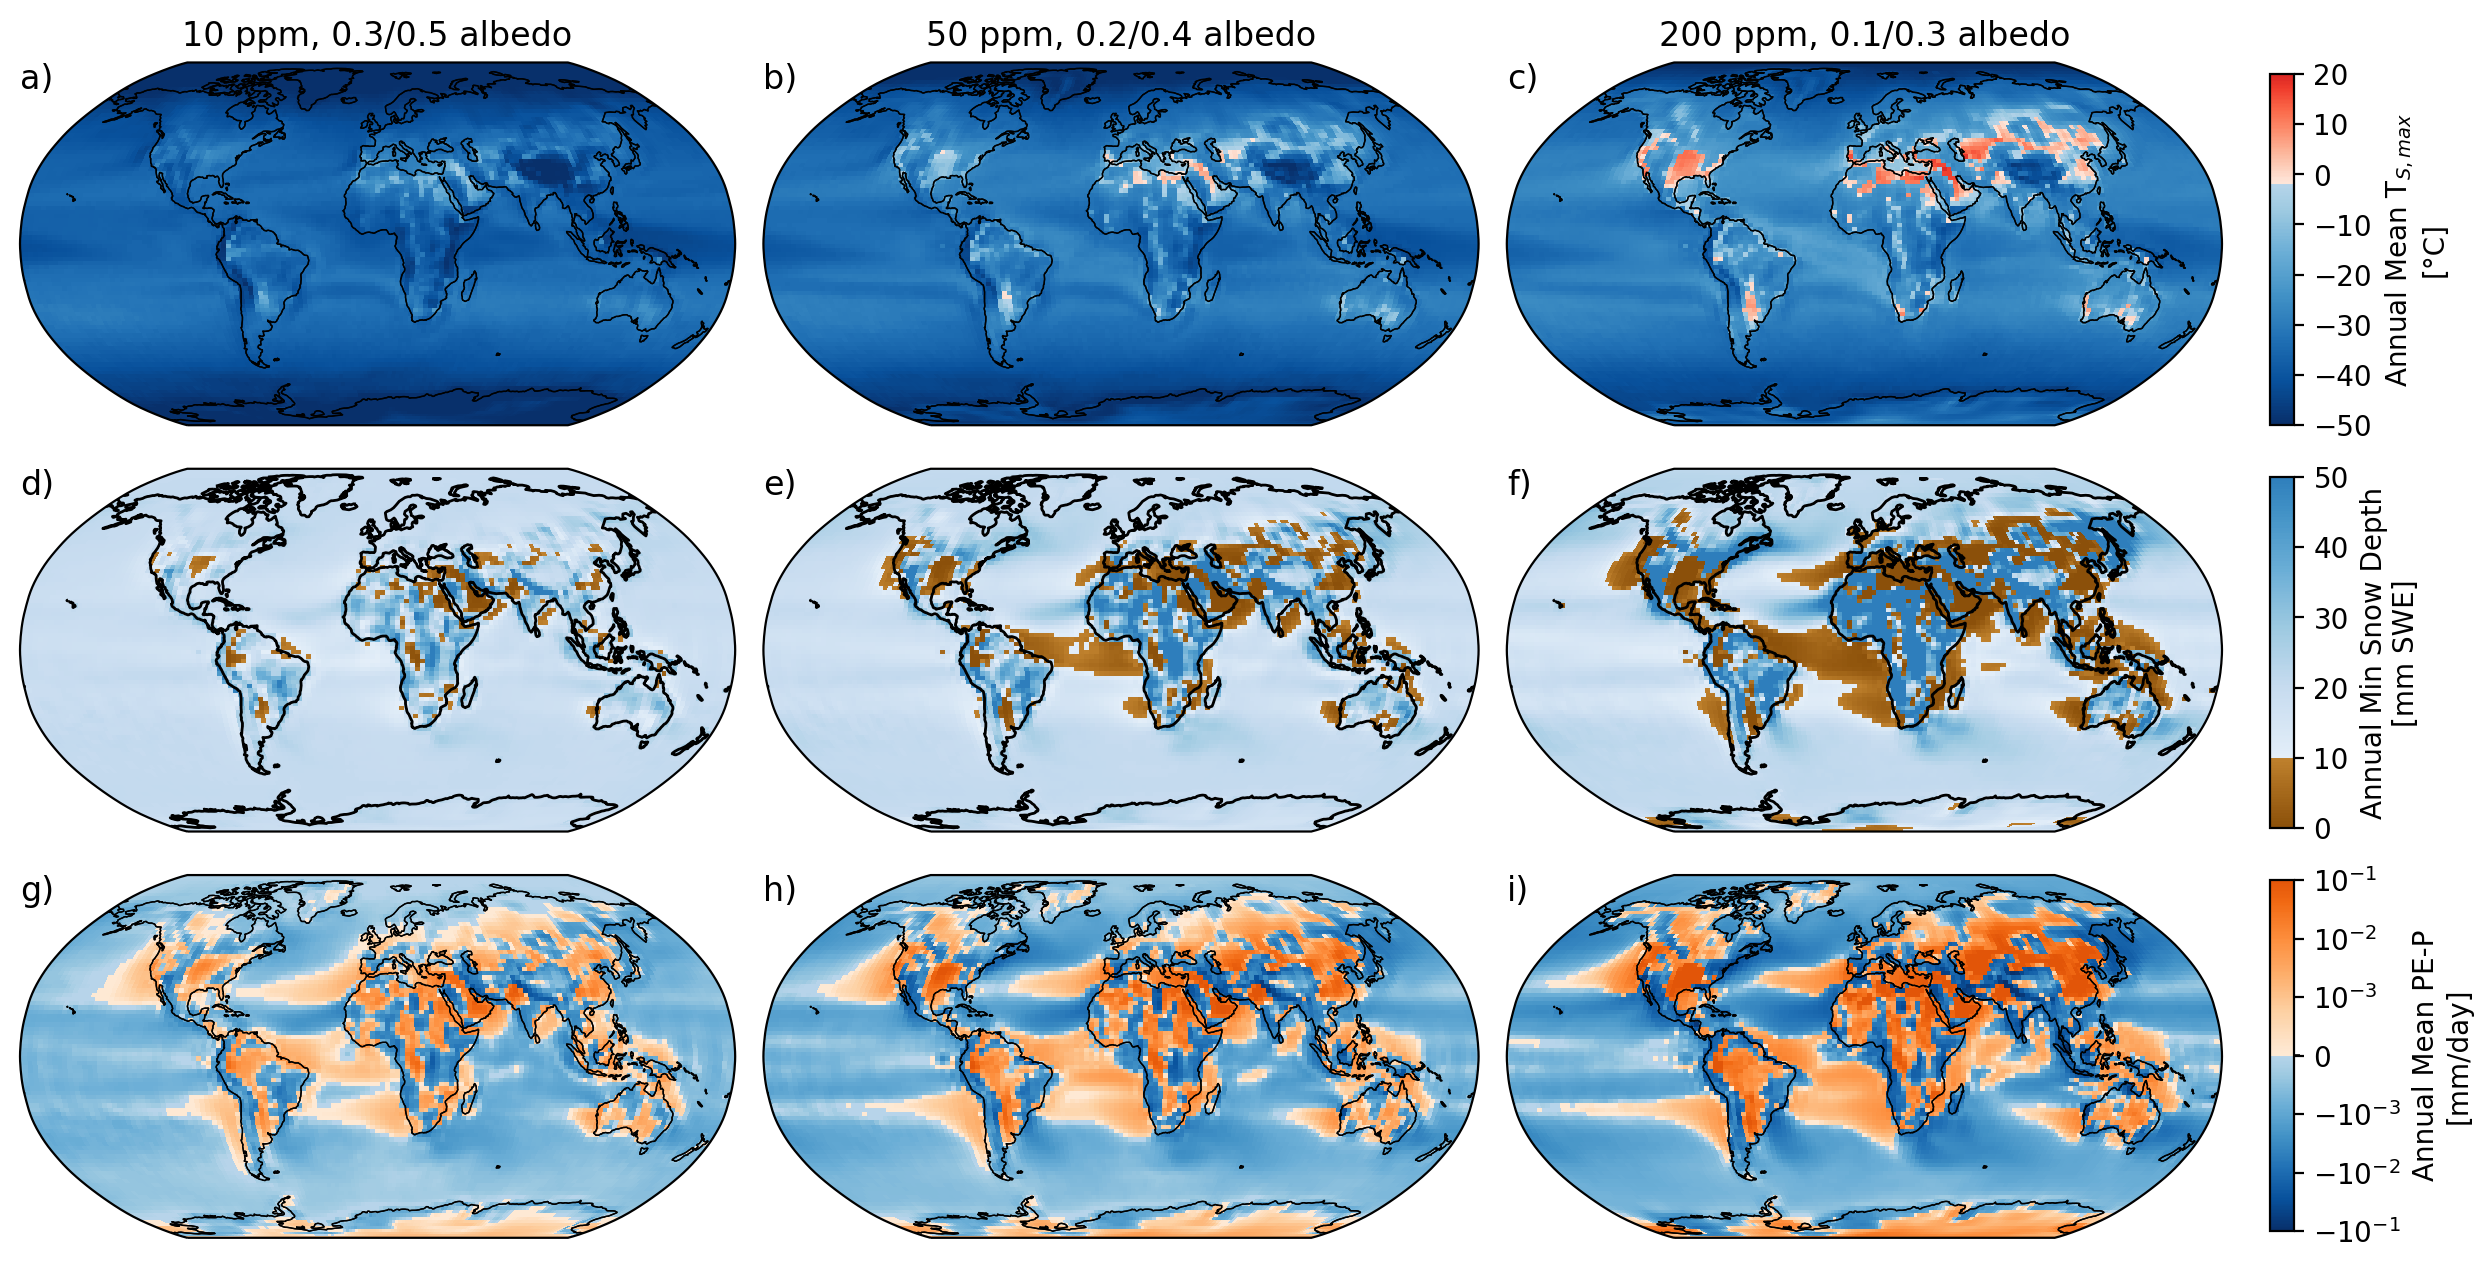

In [60]:


runs = ['moderncam4b_010p30p50a','moderncam4b_050p20p40a','moderncam4b_200p10p30a']
maps = ['TSMX', 'SNOW', 'PE-P']


nr=3
nc=3
fig, axes = plt.subplots(nr, nc, 
                         figsize=(12, 6.5),
                         dpi=200,
                         constrained_layout = True,
                         subplot_kw={'projection': ccrs.Robinson()})
runs = ['moderncam4b_010p30p50a', 'moderncam4b_050p20p40a', 'moderncam4b_200p10p30a']

# Loop through each run and create subplots
for i, run in enumerate(runs): # columns
    # Create subplot indices based on the current run
    row_index = i // 3
    col_index = i % 3

    mapdata_1a = mapdata('TSMX', run)
    p0 = axes[row_index, col_index].pcolormesh(mapdata_1a.lon, mapdata_1a.lat, mapdata_1a,
                                               cmap=cmap_ts, vmin=-50, vmax=20,
                                               transform=ccrs.PlateCarree(), 
                                               # add_colorbar = False
                                              )
    axes[row_index, col_index].coastlines(linewidth=0.5)

    mapdata_1b_i = mapdata('SNOW', run)[0]
    mapdata_1b_s = mapdata('SNOW', run)[1]
    p11 = axes[row_index + 1, col_index].pcolormesh(mapdata_1b_i.lon, mapdata_1b_i.lat, mapdata_1b_i,
                                                   vmin=cmin_snow,vmax=cmax_snow,
                                                    # levels=levels_snow,
                                                   cmap = cmap_snow,transform=ccrs.PlateCarree(),
                                                    # add_colorbar=False
                                                   )
    p12 = axes[row_index + 1, col_index].pcolormesh(mapdata_1b_s.lon, mapdata_1b_s.lat, mapdata_1b_s,
                                                   vmin=cmin_snow,vmax=cmax_snow,
                                                    # levels=levels_snow,
                                                   cmap = cmap_snow,transform=ccrs.PlateCarree(),
                                                    # add_colorbar=False
                                                   )
    axes[row_index + 1, col_index].coastlines(linewidth=1)

    mapdata_1c_l = mapdata('PE-P', run)[1]
    mapdata_1c_i = mapdata('PE-P', run)[0]
    p21 = axes[row_index + 2, col_index].pcolormesh(mapdata_1c_l.lon, mapdata_1c_l.lat, mapdata_1c_l,
                                                    # vmin=-0.2, vmax=0.2,
                                                    norm=norm_1c,
                                                    cmap=cmap_pe, transform=ccrs.PlateCarree())
    p22 = axes[row_index + 2, col_index].pcolormesh(mapdata_1c_i.lon, mapdata_1c_i.lat, mapdata_1c_i,
                                                    # vmin=-0.2, vmax=0.2,
                                                    norm=norm_1c,
                                                    cmap=cmap_pe, transform=ccrs.PlateCarree())
    axes[row_index + 2, col_index].coastlines(linewidth=0.5)


    

    # axs[i].set_global()
    # axs[i].coastlines(linewidth=0.5)
for aic in range(nc):
    for air in range(nr):
        axes[air,aic].set_global()
        axes[air,aic].coastlines(linewidth=0.5)

# axes[0,0].set_title('Max. Surface TS')
# axes[0,1].set_title('Min Snow Height')
# axes[0,2].set_title('Mean PE-P')
# p.axes.set_global()
# p.axes.coastlines(linewidth=0.5)

# Add titles to each column
for i in range(nc):
    axes[0, i].set_title(f'{run_name[runs[i]]}',fontsize=12)


# adjust subplots
plt.tight_layout()

# add colorbar axes and colorbars
fig.subplots_adjust(right=0.93)
cbar_ax_0 = fig.add_axes([0.95, 0.66, 0.01, 0.27])
fig.colorbar(p0, cax=cbar_ax_0, label='Annual Mean T$_{S, max}$\n[°C]', ticks = np.linspace(-50, 20, 8))
cbar_ax_1 = fig.add_axes([0.95, 0.35, 0.01, 0.27])
fig.colorbar(p12, cax=cbar_ax_1, label='Annual Min Snow Depth\n[mm SWE]', ticks = np.linspace(0, 50, 6))
cbar_ax_2 = fig.add_axes([0.95, 0.04, 0.01, 0.27])
fig.colorbar(p22, cax=cbar_ax_2, label='Annual Mean PE-P\n[mm/day]', ticks = [-.1, -.01, -.001, 0, .001, .01, .1])
fig.colorbar(p22, cax=cbar_ax_2, label='Annual Mean PE-P\n[mm/day]', ticks = [-.1, -.01, -.001, 0, .001, .01, .1])

# # Add labels to each subplot
axes[0,0].text(0, 1, 'a)', ha='left', va='top', transform=axes[0,0].transAxes,fontsize=12)
axes[0,1].text(0, 1, 'b)', ha='left', va='top', transform=axes[0,1].transAxes,fontsize=12)
axes[0,2].text(0, 1, 'c)', ha='left', va='top', transform=axes[0,2].transAxes,fontsize=12)
axes[1,0].text(0, 1, 'd)', ha='left', va='top', transform=axes[1,0].transAxes,fontsize=12)
axes[1,1].text(0, 1, 'e)', ha='left', va='top', transform=axes[1,1].transAxes,fontsize=12)
axes[1,2].text(0, 1, 'f)', ha='left', va='top', transform=axes[1,2].transAxes,fontsize=12)
axes[2,0].text(0, 1, 'g)', ha='left', va='top', transform=axes[2,0].transAxes,fontsize=12)
axes[2,1].text(0, 1, 'h)', ha='left', va='top', transform=axes[2,1].transAxes,fontsize=12)
axes[2,2].text(0, 1, 'i)', ha='left', va='top', transform=axes[2,2].transAxes,fontsize=12)



# Save the combined plot
filepath = 'JGRfigures/fig2_combined_log'
fig.savefig(filepath + '.png', dpi=300, facecolor=None, edgecolor=None, bbox_inches='tight', transparent=True, pad_inches=0.01)


plt.show();plt.close()

calculating PET
calculating PET
calculating PET
calculating PET
calculating PET
calculating PET
calculating PET
calculating PET
calculating PET
calculating PET
calculating PET
calculating PET


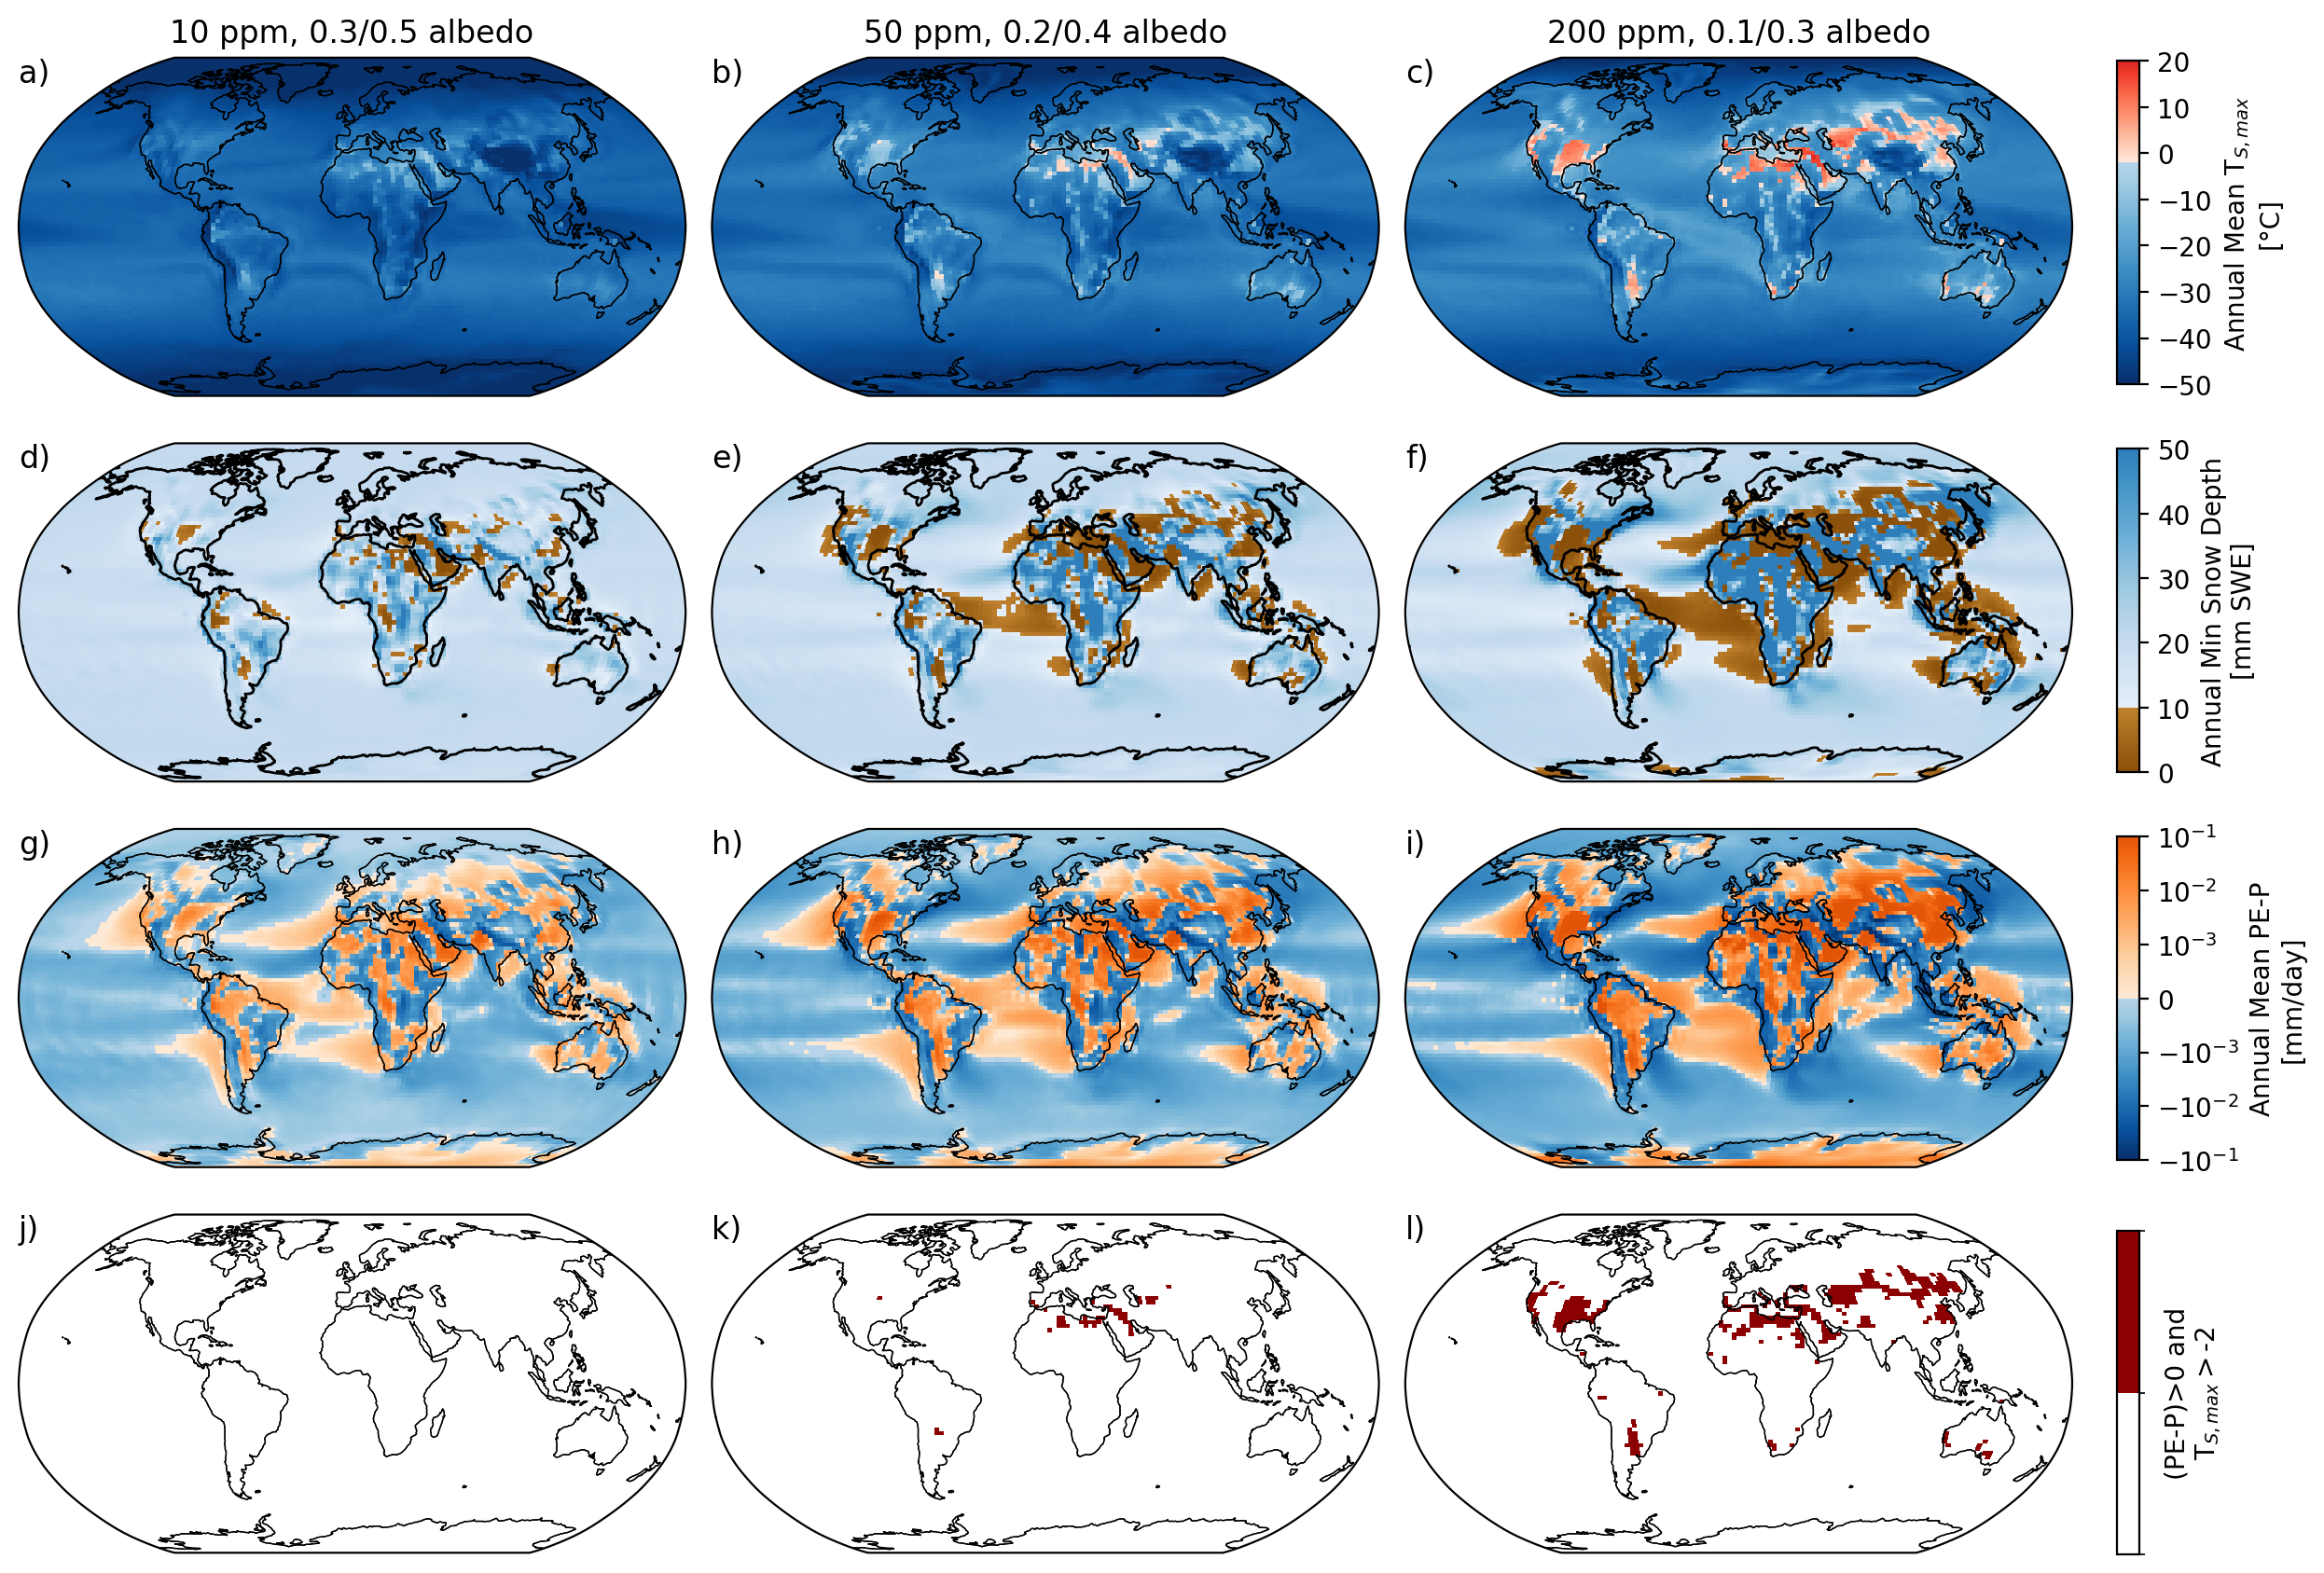

In [71]:
# alternative version with a 4th row showing overlap of warm and dry

runs = ['moderncam4b_010p30p50a','moderncam4b_050p20p40a','moderncam4b_200p10p30a']
# maps = ['TSMX', 'SNOW', 'PE-P']


nr=4
nc=3
fig, axes = plt.subplots(nr, nc, 
                         figsize=(12, 4*6.5/3),
                         dpi=200,
                         constrained_layout = True,
                         subplot_kw={'projection': ccrs.Robinson()})
runs = ['moderncam4b_010p30p50a', 'moderncam4b_050p20p40a', 'moderncam4b_200p10p30a']

# Loop through each run and create subplots
for i, run in enumerate(runs): # columns
    # Create subplot indices based on the current run
    row_index = i // 3
    col_index = i % 3

    mapdata_1a = mapdata('TSMX', run)
    p0 = axes[row_index, col_index].pcolormesh(mapdata_1a.lon, mapdata_1a.lat, mapdata_1a,
                                               cmap=cmap_ts, vmin=-50, vmax=20,
                                               transform=ccrs.PlateCarree(), 
                                               # add_colorbar = False
                                              )
    axes[row_index, col_index].coastlines(linewidth=0.5)

    mapdata_1b_i = mapdata('SNOW', run)[0]
    mapdata_1b_s = mapdata('SNOW', run)[1]
    p11 = axes[row_index + 1, col_index].pcolormesh(mapdata_1b_i.lon, mapdata_1b_i.lat, mapdata_1b_i,
                                                   vmin=cmin_snow,vmax=cmax_snow,
                                                    # levels=levels_snow,
                                                   cmap = cmap_snow,transform=ccrs.PlateCarree(),
                                                    # add_colorbar=False
                                                   )
    p12 = axes[row_index + 1, col_index].pcolormesh(mapdata_1b_s.lon, mapdata_1b_s.lat, mapdata_1b_s,
                                                   vmin=cmin_snow,vmax=cmax_snow,
                                                    # levels=levels_snow,
                                                   cmap = cmap_snow,transform=ccrs.PlateCarree(),
                                                    # add_colorbar=False
                                                   )
    axes[row_index + 1, col_index].coastlines(linewidth=1)

    mapdata_1c_l = mapdata('PE-P', run)[1]
    mapdata_1c_i = mapdata('PE-P', run)[0]
    p21 = axes[row_index + 2, col_index].pcolormesh(mapdata_1c_l.lon, mapdata_1c_l.lat, mapdata_1c_l,
                                                    # vmin=-0.2, vmax=0.2,
                                                    norm=norm_1c,
                                                    cmap=cmap_pe, transform=ccrs.PlateCarree())
    p22 = axes[row_index + 2, col_index].pcolormesh(mapdata_1c_i.lon, mapdata_1c_i.lat, mapdata_1c_i,
                                                    # vmin=-0.2, vmax=0.2,
                                                    norm=norm_1c,
                                                    cmap=cmap_pe, transform=ccrs.PlateCarree())
    axes[row_index + 2, col_index].coastlines(linewidth=0.5)


    
    # add a fourth row
    mapdata_1d_l=mapdata_1c_l.where(mapdata_1a>-2)
    mapdata_1d_i=mapdata_1c_i.where(mapdata_1a>-2)
    cmapRed = colors.ListedColormap(['white', 'darkred'])
    bounds=[-100,0,100]
    norm_1d= colors.BoundaryNorm(bounds, cmapRed.N)
    p31 = axes[row_index + 3, col_index].pcolormesh(mapdata_1d_l.lon, mapdata_1d_l.lat, mapdata_1d_l,
                                                    # vmin=0, vmax=0.0001,
                                                    norm=norm_1d,
                                                    cmap=cmapRed, transform=ccrs.PlateCarree())
    p32 = axes[row_index + 3, col_index].pcolormesh(mapdata_1d_i.lon, mapdata_1d_i.lat, mapdata_1d_i,
                                                    # vmin=0, vmax=0.0001,
                                                    norm=norm_1d,
                                                    cmap=cmapRed, transform=ccrs.PlateCarree())
    axes[row_index + 3, col_index].coastlines(linewidth=0.5)
 

    # axs[i].set_global()
    # axs[i].coastlines(linewidth=0.5)
for aic in range(nc):
    for air in range(nr):
        axes[air,aic].set_global()
        axes[air,aic].coastlines(linewidth=0.5)

# axes[0,0].set_title('Max. Surface TS')
# axes[0,1].set_title('Min Snow Height')
# axes[0,2].set_title('Mean PE-P')
# p.axes.set_global()
# p.axes.coastlines(linewidth=0.5)

# Add titles to each column
for i in range(nc):
    axes[0, i].set_title(f'{run_name[runs[i]]}',fontsize=12)


# adjust subplots
plt.tight_layout()

# add colorbar axes and colorbars
fig.subplots_adjust(right=0.93)
cbar_ax_0 = fig.add_axes([0.95, 0.75, 0.01, 0.20])
fig.colorbar(p0, cax=cbar_ax_0, label='Annual Mean T$_{S, max}$\n[°C]', ticks = np.linspace(-50, 20, 8))
cbar_ax_1 = fig.add_axes([0.95, 0.51, 0.01, 0.20])
fig.colorbar(p12, cax=cbar_ax_1, label='Annual Min Snow Depth\n[mm SWE]', ticks = np.linspace(0, 50, 6))
cbar_ax_2 = fig.add_axes([0.95, 0.27, 0.01, 0.20])
fig.colorbar(p22, cax=cbar_ax_2, label='Annual Mean PE-P\n[mm/day]', ticks = [-.1, -.01, -.001, 0, .001, .01, .1])
fig.colorbar(p22, cax=cbar_ax_2, label='Annual Mean PE-P\n[mm/day]', ticks = [-.1, -.01, -.001, 0, .001, .01, .1])
cbar_ax_3 = fig.add_axes([0.95, 0.026, 0.01, 0.20])
fig.colorbar(p32, cax=cbar_ax_3, label='(PE-P)>0 and\nT$_{S, max}>$-2', ticks = [])
fig.colorbar(p32, cax=cbar_ax_3, label='(PE-P)>0 and\nT$_{S, max}>$-2', ticks = [])



# # Add labels to each subplot
axes[0,0].text(0, 1, 'a)', ha='left', va='top', transform=axes[0,0].transAxes,fontsize=12)
axes[0,1].text(0, 1, 'b)', ha='left', va='top', transform=axes[0,1].transAxes,fontsize=12)
axes[0,2].text(0, 1, 'c)', ha='left', va='top', transform=axes[0,2].transAxes,fontsize=12)
axes[1,0].text(0, 1, 'd)', ha='left', va='top', transform=axes[1,0].transAxes,fontsize=12)
axes[1,1].text(0, 1, 'e)', ha='left', va='top', transform=axes[1,1].transAxes,fontsize=12)
axes[1,2].text(0, 1, 'f)', ha='left', va='top', transform=axes[1,2].transAxes,fontsize=12)
axes[2,0].text(0, 1, 'g)', ha='left', va='top', transform=axes[2,0].transAxes,fontsize=12)
axes[2,1].text(0, 1, 'h)', ha='left', va='top', transform=axes[2,1].transAxes,fontsize=12)
axes[2,2].text(0, 1, 'i)', ha='left', va='top', transform=axes[2,2].transAxes,fontsize=12)
axes[3,0].text(0, 1, 'j)', ha='left', va='top', transform=axes[3,0].transAxes,fontsize=12)
axes[3,1].text(0, 1, 'k)', ha='left', va='top', transform=axes[3,1].transAxes,fontsize=12)
axes[3,2].text(0, 1, 'l)', ha='left', va='top', transform=axes[3,2].transAxes,fontsize=12)


# Save the combined plot
filepath = 'JGRfigures/fig2_4 rows'
fig.savefig(filepath + '.png', dpi=300, facecolor=None, edgecolor=None, bbox_inches='tight', transparent=True, pad_inches=0.01)


plt.show();plt.close()

In [ ]:
print(mapdata_1c_l)


In [ ]:
## blank plot to adjust layout
fig, axes = plt.subplots(3, 3, 
                         figsize=(12, 6.5),
                         dpi=200,
                         constrained_layout = True,
                         subplot_kw={'projection': ccrs.Robinson()})

# Add titles to each column
for i in range(3):
    axes[0, i].set_title(f'{run_name[runs[i]]}',fontsize=12)


# fig.tight_layout()
# fig.subplots_adjust(top=0.95)

# plt.subplots_adjust(hspace=0.01)#,wspace=0.05)

# adjust subplots
plt.tight_layout()

# add colorbar axes and colorbars
fig.subplots_adjust(right=0.93)
cbar_ax_0 = fig.add_axes([0.95, 0.66, 0.01, 0.27])
fig.colorbar(p0, cax=cbar_ax_0, label='Annual Mean T$_{S, max}$\n[°C]', ticks = np.linspace(-50, 20, 8))
cbar_ax_1 = fig.add_axes([0.95, 0.35, 0.01, 0.27])
fig.colorbar(p12, cax=cbar_ax_1, label='Annual Min Snow Depth\n[mm SWE]', ticks = np.linspace(0, 50, 6))
cbar_ax_2 = fig.add_axes([0.95, 0.04, 0.01, 0.27])
fig.colorbar(p22, cax=cbar_ax_2, label='Annual Mean PE-P\n[mm/day]', ticks = [-.1, -.01, -.001, 0, .001, .01, .1])



# # Define labels
# labels = list(string.ascii_lowercase)[:len(axes)]

# # Add labels to each subplot
# for i, ax in enumerate(axes):
#     ax.text(0, 1, f'{labels[i]})', ha='left', va='top', transform=ax.transAxes)

axes[0,0].text(0, 1, 'a)', ha='left', va='top', transform=axes[0,0].transAxes,fontsize=12)
axes[0,1].text(0, 1, 'b)', ha='left', va='top', transform=axes[0,1].transAxes,fontsize=12)
axes[0,2].text(0, 1, 'c)', ha='left', va='top', transform=axes[0,2].transAxes,fontsize=12)
axes[1,0].text(0, 1, 'd)', ha='left', va='top', transform=axes[1,0].transAxes,fontsize=12)
axes[1,1].text(0, 1, 'e)', ha='left', va='top', transform=axes[1,1].transAxes,fontsize=12)
axes[1,2].text(0, 1, 'f)', ha='left', va='top', transform=axes[1,2].transAxes,fontsize=12)
axes[2,0].text(0, 1, 'g)', ha='left', va='top', transform=axes[2,0].transAxes,fontsize=12)
axes[2,1].text(0, 1, 'h)', ha='left', va='top', transform=axes[2,1].transAxes,fontsize=12)
axes[2,2].text(0, 1, 'i)', ha='left', va='top', transform=axes[2,2].transAxes,fontsize=12)





plt.show();plt.close()

In [ ]:
## blank plot to adjust layout
fig, axes = plt.subplots(4, 3, 
                         figsize=(12, 4*6.5/3),
                         dpi=200,
                         constrained_layout = True,
                         subplot_kw={'projection': ccrs.Robinson()})

# Add titles to each column
for i in range(3):
    axes[0, i].set_title(f'{run_name[runs[i]]}',fontsize=12)


# fig.tight_layout()
# fig.subplots_adjust(top=0.95)

# plt.subplots_adjust(hspace=0.01)#,wspace=0.05)

# adjust subplots
plt.tight_layout()

# add colorbar axes and colorbars
fig.subplots_adjust(right=0.93)
cbar_ax_0 = fig.add_axes([0.95, 0.75, 0.01, 0.20])
fig.colorbar(p0, cax=cbar_ax_0, label='Annual Mean T$_{S, max}$\n[°C]', ticks = np.linspace(-50, 20, 8))
cbar_ax_1 = fig.add_axes([0.95, 0.51, 0.01, 0.20])
fig.colorbar(p12, cax=cbar_ax_1, label='Annual Min Snow Depth\n[mm SWE]', ticks = np.linspace(0, 50, 6))
cbar_ax_2 = fig.add_axes([0.95, 0.27, 0.01, 0.20])
fig.colorbar(p22, cax=cbar_ax_2, label='Annual Mean PE-P\n[mm/day]', ticks = [-.1, -.01, -.001, 0, .001, .01, .1])
fig.colorbar(p22, cax=cbar_ax_2, label='Annual Mean PE-P\n[mm/day]', ticks = [-.1, -.01, -.001, 0, .001, .01, .1])
cbar_ax_3 = fig.add_axes([0.95, 0.026, 0.01, 0.20])
fig.colorbar(p32, cax=cbar_ax_3, label='(PE-P)>0 and T$_{S, max}>$-2', ticks = [])
fig.colorbar(p32, cax=cbar_ax_3, label='(PE-P)>0 and T$_{S, max}>$-2', ticks = [])


# # Define labels
# labels = list(string.ascii_lowercase)[:len(axes)]

# # Add labels to each subplot
# for i, ax in enumerate(axes):
#     ax.text(0, 1, f'{labels[i]})', ha='left', va='top', transform=ax.transAxes)

axes[0,0].text(0, 1, 'a)', ha='left', va='top', transform=axes[0,0].transAxes,fontsize=12)
axes[0,1].text(0, 1, 'b)', ha='left', va='top', transform=axes[0,1].transAxes,fontsize=12)
axes[0,2].text(0, 1, 'c)', ha='left', va='top', transform=axes[0,2].transAxes,fontsize=12)
axes[1,0].text(0, 1, 'd)', ha='left', va='top', transform=axes[1,0].transAxes,fontsize=12)
axes[1,1].text(0, 1, 'e)', ha='left', va='top', transform=axes[1,1].transAxes,fontsize=12)
axes[1,2].text(0, 1, 'f)', ha='left', va='top', transform=axes[1,2].transAxes,fontsize=12)
axes[2,0].text(0, 1, 'g)', ha='left', va='top', transform=axes[2,0].transAxes,fontsize=12)
axes[2,1].text(0, 1, 'h)', ha='left', va='top', transform=axes[2,1].transAxes,fontsize=12)
axes[2,2].text(0, 1, 'i)', ha='left', va='top', transform=axes[2,2].transAxes,fontsize=12)
axes[3,0].text(0, 1, 'j)', ha='left', va='top', transform=axes[2,0].transAxes,fontsize=12)
axes[3,1].text(0, 1, 'k)', ha='left', va='top', transform=axes[2,1].transAxes,fontsize=12)
axes[3,2].text(0, 1, 'l)', ha='left', va='top', transform=axes[2,2].transAxes,fontsize=12)





plt.show();plt.close()

# Assessment of CO2 Radiative Forcing

In [57]:
runlist

['moderncam4b_010p10p30a',
 'moderncam4b_010p20p40a',
 'moderncam4b_010p30p50a',
 'moderncam4b_025p20p40a',
 'moderncam4b_050p10p30a',
 'moderncam4b_050p15p35a',
 'moderncam4b_050p20p40a',
 'moderncam4b_050p25p45a',
 'moderncam4b_050p30p50a',
 'moderncam4b_100p20p40a',
 'moderncam4b_200p10p30a',
 'moderncam4b_200p20p40a',
 'moderncam4b_200p30p50a']

In [58]:
rad_runlist = ['moderncam4b_050p20p40a_port_base',
               'moderncam4b_050p20p40a_port_p20p40alb_case',
               'moderncam4b_050p20p40a_port_0.2xco2_case',
               'moderncam4b_050p20p40a_port_0.5xco2_case',
               'moderncam4b_050p20p40a_port_2.0xco2_case',
               'moderncam4b_050p20p40a_port_4.0xco2_case',
               'moderncam4b_050p20p40a_port_p10p30alb_case',
               'moderncam4b_050p20p40a_port_p15p35alb_case',
               'moderncam4b_050p20p40a_port_p25p45alb_case',
               'moderncam4b_050p20p40a_port_p30p50alb_case',
              ]

rad_runname = {
    'moderncam4b_050p20p40a_port_base': 'base: 50 ppm, 0.2/0.4 alb',
    'moderncam4b_050p20p40a_port_p20p40alb_case': '50 ppm, 0.2/0.4 alb',
    'moderncam4b_050p20p40a_port_0.2xco2_case': '10 ppm, 0.2/0.4 alb',
    'moderncam4b_050p20p40a_port_0.5xco2_case': '25 ppm, 0.2/0.4 alb',
    'moderncam4b_050p20p40a_port_2.0xco2_case': '100 ppm, 0.2/0.4 alb',
    'moderncam4b_050p20p40a_port_4.0xco2_case': '200 ppm, 0.2/0.4 alb',
    'moderncam4b_050p20p40a_port_p10p30alb_case': '50 ppm, 0.1/0.3 alb',
    'moderncam4b_050p20p40a_port_p15p35alb_case': '50 ppm, 0.15/0.35 alb',
    'moderncam4b_050p20p40a_port_p25p45alb_case': '50 ppm, 0.25/0.45 alb',
    'moderncam4b_050p20p40a_port_p30p50alb_case': '50 ppm, 0.3/0.5 alb',
}

In [59]:
## pull in rad forcing
files_rad = {}
ds_rad = {}
for run in rad_runlist:
    if run == 'moderncam4b_050p20p40a_port_0.5xco2_case':
        print('loading', rad_runname[run])
        print('skipping')
        pass
    else:
        print('loading', rad_runname[run])
        if run == 'moderncam4b_050p20p40a_port_base':
            files_rad[run] = datapath +'%s/atm/hist/%s.cam.h1.000*.nc' % (run, run)
        else:
            files_rad[run] = datapath +'%s/atm/hist/%s.cam.h1.*.nc' % (run, run)
        ds_rad[run] = xr.open_mfdataset(files_rad[run])
        print(rad_runname[run])

loading base: 50 ppm, 0.2/0.4 alb
base: 50 ppm, 0.2/0.4 alb
loading 50 ppm, 0.2/0.4 alb
50 ppm, 0.2/0.4 alb
loading 10 ppm, 0.2/0.4 alb
10 ppm, 0.2/0.4 alb
loading 25 ppm, 0.2/0.4 alb
skipping
loading 100 ppm, 0.2/0.4 alb
100 ppm, 0.2/0.4 alb
loading 200 ppm, 0.2/0.4 alb
200 ppm, 0.2/0.4 alb
loading 50 ppm, 0.1/0.3 alb
50 ppm, 0.1/0.3 alb
loading 50 ppm, 0.15/0.35 alb
50 ppm, 0.15/0.35 alb
loading 50 ppm, 0.25/0.45 alb
50 ppm, 0.25/0.45 alb
loading 50 ppm, 0.3/0.5 alb
50 ppm, 0.3/0.5 alb


In [60]:
# ds_rad[rad_runlist[1]]

### calculate TOA radiation using PORT runs

delta TOA between two runs is the radiative forcing

In [61]:


# FLNR-FSNR
TOA = {}
for run in rad_runlist:
    if run == 'moderncam4b_050p20p40a_port_0.5xco2_case':
        print('loading', rad_runname[run])
        print('skipping')
        pass
    else:
        FLNR = (ds_rad[run]['FLNR'][-240:].mean('time')*(area_grid/area_grid.sum(('lat','lon')))).sum(('lat','lon'))
        FSNR = (ds_rad[run]['FSNR'][-240:].mean('time')*(area_grid/area_grid.sum(('lat','lon')))).sum(('lat','lon'))
        
        TOA[run] = (FLNR - FSNR).values
TOA


loading 25 ppm, 0.2/0.4 alb
skipping


{'moderncam4b_050p20p40a_port_base': array(13.95624738),
 'moderncam4b_050p20p40a_port_p20p40alb_case': array(10.80358804),
 'moderncam4b_050p20p40a_port_0.2xco2_case': array(16.7079198),
 'moderncam4b_050p20p40a_port_2.0xco2_case': array(12.76601834),
 'moderncam4b_050p20p40a_port_4.0xco2_case': array(11.54588903),
 'moderncam4b_050p20p40a_port_p10p30alb_case': array(8.79239872),
 'moderncam4b_050p20p40a_port_p15p35alb_case': array(9.79307427),
 'moderncam4b_050p20p40a_port_p25p45alb_case': array(11.82425572),
 'moderncam4b_050p20p40a_port_p30p50alb_case': array(12.85540903)}

In [62]:
'''

# FLNR-FSNR
TOA = {}
for run in rad_runlist:
    if run == 'moderncam4b_050p20p40a_port_0.5xco2_case':
        print('loading', rad_runname[run])
        print('skipping')
        pass
    else:
        FLNR = ds_rad[run]['FLNR'][-240:].weighted(latweights).mean(dim=['time','lat','lon'])  
        FSNR = ds_rad[run]['FSNR'][-240:].weighted(latweights).mean(dim=['time','lat','lon'])  
        
        TOA[run] = (FLNR_alt - FSNR_alt).values
TOA


'''


"\n\n# FLNR-FSNR\nTOA = {}\nfor run in rad_runlist:\n    if run == 'moderncam4b_050p20p40a_port_0.5xco2_case':\n        print('loading', rad_runname[run])\n        print('skipping')\n        pass\n    else:\n        FLNR = ds_rad[run]['FLNR'][-240:].weighted(latweights).mean(dim=['time','lat','lon'])  \n        FSNR = ds_rad[run]['FSNR'][-240:].weighted(latweights).mean(dim=['time','lat','lon'])  \n        \n        TOA[run] = (FLNR_alt - FSNR_alt).values\nTOA\n\n\n"

In [63]:
# forgot to run 25 ppm port run, but ran it for the alternate case; the radtiative forcing is a factor of -1.0121447720493264x that of 50 to 100
factor = -1.0121447720493264

In [64]:
print('albedo forcing')
print('0.2/0.4 to 0.3/0.5', np.round(TOA['moderncam4b_050p20p40a_port_p20p40alb_case']-TOA['moderncam4b_050p20p40a_port_p30p50alb_case'],2))
print('0.2/0.4 to 0.25/0.45', np.round(TOA['moderncam4b_050p20p40a_port_p20p40alb_case']-TOA['moderncam4b_050p20p40a_port_p25p45alb_case'],2))
print('0.2/0.4 to 0.2/0.4', np.round(TOA['moderncam4b_050p20p40a_port_p20p40alb_case']-TOA['moderncam4b_050p20p40a_port_p20p40alb_case'],2))
print('0.2/0.4 to 0.15/0.35', np.round(TOA['moderncam4b_050p20p40a_port_p20p40alb_case']-TOA['moderncam4b_050p20p40a_port_p15p35alb_case'],2))
print('0.2/0.4 to 0.1/0.3', np.round(TOA['moderncam4b_050p20p40a_port_p20p40alb_case']-TOA['moderncam4b_050p20p40a_port_p10p30alb_case'],2))

print('co2 forcing')
print('50 to 10', np.round(TOA['moderncam4b_050p20p40a_port_base']-TOA['moderncam4b_050p20p40a_port_0.2xco2_case'],2))
print('50 to 25', np.round(factor*(TOA['moderncam4b_050p20p40a_port_base']-TOA['moderncam4b_050p20p40a_port_2.0xco2_case']),2))
print('50 to 50', np.round(TOA['moderncam4b_050p20p40a_port_base']-TOA['moderncam4b_050p20p40a_port_base'],2))
print('50 to 100', np.round(TOA['moderncam4b_050p20p40a_port_base']-TOA['moderncam4b_050p20p40a_port_2.0xco2_case'],2))
print('50 to 200', np.round(TOA['moderncam4b_050p20p40a_port_base']-TOA['moderncam4b_050p20p40a_port_4.0xco2_case'],2))


albedo forcing
0.2/0.4 to 0.3/0.5 -2.05
0.2/0.4 to 0.25/0.45 -1.02
0.2/0.4 to 0.2/0.4 0.0
0.2/0.4 to 0.15/0.35 1.01
0.2/0.4 to 0.1/0.3 2.01
co2 forcing
50 to 10 -2.75
50 to 25 -1.2
50 to 50 0.0
50 to 100 1.19
50 to 200 2.41


In [65]:
print('albedo forcing')
rad_forcing ={}

rad_forcing['p30p50'] = TOA['moderncam4b_050p20p40a_port_p20p40alb_case']-TOA['moderncam4b_050p20p40a_port_p30p50alb_case'] -(TOA['moderncam4b_050p20p40a_port_p20p40alb_case']-TOA['moderncam4b_050p20p40a_port_p30p50alb_case'])
print('p30p50 to p30p50 = ', np.round(rad_forcing['p30p50'],2))

rad_forcing['p25p45'] = TOA['moderncam4b_050p20p40a_port_p20p40alb_case']-TOA['moderncam4b_050p20p40a_port_p25p45alb_case'] -(TOA['moderncam4b_050p20p40a_port_p20p40alb_case']-TOA['moderncam4b_050p20p40a_port_p30p50alb_case'])
print('p30p50 to p25p45 = ', np.round(rad_forcing['p25p45'],2))

rad_forcing['p20p40'] = TOA['moderncam4b_050p20p40a_port_p20p40alb_case']-TOA['moderncam4b_050p20p40a_port_p20p40alb_case'] -(TOA['moderncam4b_050p20p40a_port_p20p40alb_case']-TOA['moderncam4b_050p20p40a_port_p30p50alb_case'])
print('p30p50 to p20p40 = ', np.round(rad_forcing['p20p40'],2))

rad_forcing['p15p35'] = TOA['moderncam4b_050p20p40a_port_p20p40alb_case']-TOA['moderncam4b_050p20p40a_port_p15p35alb_case'] -(TOA['moderncam4b_050p20p40a_port_p20p40alb_case']-TOA['moderncam4b_050p20p40a_port_p30p50alb_case'])
print('p30p50 to p15p35 = ', np.round(rad_forcing['p15p35'],2))

rad_forcing['p10p30'] = TOA['moderncam4b_050p20p40a_port_p20p40alb_case']-TOA['moderncam4b_050p20p40a_port_p10p30alb_case'] -(TOA['moderncam4b_050p20p40a_port_p20p40alb_case']-TOA['moderncam4b_050p20p40a_port_p30p50alb_case'])
print('p30p50 to p10p30 = ', np.round(rad_forcing['p10p30'],2))

print('co2 forcing')
rad_forcing['010'] = TOA['moderncam4b_050p20p40a_port_base']-TOA['moderncam4b_050p20p40a_port_0.2xco2_case']-(TOA['moderncam4b_050p20p40a_port_base']-TOA['moderncam4b_050p20p40a_port_0.2xco2_case'])
print('10 to 10 = ', np.round(rad_forcing['010'],2))

rad_forcing['025'] = ((factor*(TOA['moderncam4b_050p20p40a_port_base']-TOA['moderncam4b_050p20p40a_port_2.0xco2_case']))-(TOA['moderncam4b_050p20p40a_port_base']-TOA['moderncam4b_050p20p40a_port_0.2xco2_case']))
print('10 to 25 = ', np.round(rad_forcing['025'],2))

rad_forcing['050'] = TOA['moderncam4b_050p20p40a_port_base']-TOA['moderncam4b_050p20p40a_port_base']-(TOA['moderncam4b_050p20p40a_port_base']-TOA['moderncam4b_050p20p40a_port_0.2xco2_case'])
print('10 to 50 = ', np.round(rad_forcing['050'],2))

rad_forcing['100'] = TOA['moderncam4b_050p20p40a_port_base']-TOA['moderncam4b_050p20p40a_port_2.0xco2_case']-(TOA['moderncam4b_050p20p40a_port_base']-TOA['moderncam4b_050p20p40a_port_0.2xco2_case'])
print('10 to 100 = ', np.round(rad_forcing['100'],2))

rad_forcing['200'] = TOA['moderncam4b_050p20p40a_port_base']-TOA['moderncam4b_050p20p40a_port_4.0xco2_case']-(TOA['moderncam4b_050p20p40a_port_base']-TOA['moderncam4b_050p20p40a_port_0.2xco2_case'])
print('10 to 200 = ', np.round(rad_forcing['200'],2))

albedo forcing
p30p50 to p30p50 =  0.0
p30p50 to p25p45 =  1.03
p30p50 to p20p40 =  2.05
p30p50 to p15p35 =  3.06
p30p50 to p10p30 =  4.06
co2 forcing
10 to 10 =  0.0
10 to 25 =  1.55
10 to 50 =  2.75
10 to 100 =  3.94
10 to 200 =  5.16


### total radiative forcing is the sum of albedo and CO2 forcing

In [66]:
# create a dictionary of radiative forcing values for each run
rf = {}
for run in runlist:
    co2 = str(run)[12:15]
    alb = str(run)[15:21]
    rf[run] = rad_forcing[co2] + rad_forcing[alb]
for run in runlist:
    print(run_name[run], np.round(rf[run], 2))

10 ppm, 0.1/0.3 albedo 4.06
10 ppm, 0.2/0.4 albedo 2.05
10 ppm, 0.3/0.5 albedo 0.0
25 ppm, 0.2/0.4 albedo 3.6
50 ppm, 0.1/0.3 albedo 6.81
50 ppm, 0.15/0.35 albedo 5.81
50 ppm, 0.2/0.4 albedo 4.8
50 ppm, 0.25/0.45 albedo 3.78
50 ppm, 0.3/0.5 albedo 2.75
100 ppm, 0.2/0.4 albedo 5.99
200 ppm, 0.1/0.3 albedo 9.23
200 ppm, 0.2/0.4 albedo 7.21
200 ppm, 0.3/0.5 albedo 5.16


## Area for each mechanism of warming or PE change

In [ ]:
# land_area = (area_grid*ds_atm[run]['LANDFRAC'][0]).sum('lat').sum('lon')

In [ ]:
# Mechanism:
# Land area that moves from snow-covered to non-snow-covered

run_ctl = 'moderncam4b_200p30p50a'
run_exp = 'moderncam4b_200p10p30a'
def snow_free(run):
    snow = ds_atm[run]['SNOWHLND'].groupby(ds_atm[run]['SNOWHLND'].time.dt.month).mean('time').min('month')  #mm
    snow_free_land = snow.where(snow<10,np.nan).where(ds_atm[run]['LANDFRAC'][0]>0,np.nan)
    snow_free_land_ones = xr.ones_like(snow_free_land).where(np.isfinite(snow_free_land),0)
    return snow_free_land_ones

def above_freezing(run):
    TSMX = ds_atm[run]['TSMX'].groupby(ds_atm[run]['TSMX'].time.dt.year).max('time').mean('year')  # K
    TSMX_warm_land = TSMX.where(TSMX>271.15,np.nan).where(ds_atm[run]['LANDFRAC'][0]>0,np.nan)
    TSMX_warm_land_ones = xr.ones_like(TSMX_warm_land).where(np.isfinite(TSMX_warm_land),0)
    return TSMX_warm_land_ones

In [ ]:
# DIRECT WARMING: return area of land that went from cold to warm and from snow-free to snow-free
direct = area_grid.where(snow_free(run_ctl) == 1).where(snow_free(run_exp) == 1).where(above_freezing(run_ctl) == 0).where(above_freezing(run_exp) == 1)
print('DIRECT:', run_name[run_ctl],'to',run_name[run_exp], np.round((direct.sum('lat').sum('lon').values/land_area*100).values,2), '%')

In [ ]:
# INDIRECT WARMING: return area of land that went from cold to warm and from snow-covered to snow-free
indirect = area_grid.where(snow_free(run_ctl) == 0).where(snow_free(run_exp) == 1).where(above_freezing(run_ctl) == 0).where(above_freezing(run_exp) == 1)
print('INDIRECT:', run_name[run_ctl],'to',run_name[run_exp], np.round((indirect.sum('lat').sum('lon').values/land_area*100).values,2), '%')

In [ ]:
# WARMED, ALWAYS SNOWY: return area of land that went from cold to warm and from snow-covered to snow-covered
warm_snow = area_grid.where(snow_free(run_ctl) == 0).where(snow_free(run_exp) == 0).where(above_freezing(run_ctl) == 0).where(above_freezing(run_exp) == 1)
print('WARM SNOW:', run_name[run_ctl],'to',run_name[run_exp], np.round((warm_snow.sum('lat').sum('lon').values/land_area*100).values,2), '%')

In [ ]:
# WARMED AND GOT SNOWY: return area of land that went from cold to warm and from snow-covered to snow-covered
warm_FROM_snow = area_grid.where(snow_free(run_ctl) == 1).where(snow_free(run_exp) == 0).where(above_freezing(run_ctl) == 0).where(above_freezing(run_exp) == 1)
print('WARMED FROM SNOW:', run_name[run_ctl],'to',run_name[run_exp], np.round((warm_FROM_snow.sum('lat').sum('lon').values/land_area*100).values,2), '%')

In [ ]:
# TOTAL WARMING: return area of land that went from cold to warm (regardless of snow)
total_warming = area_grid.where(above_freezing(run_ctl) == 0).where(above_freezing(run_exp) == 1)
print('TOTAL WARMING:', run_name[run_ctl],'to',run_name[run_exp], np.round((total_warming.sum('lat').sum('lon').values/land_area*100).values,2), '%')

In [ ]:
((direct.sum('lat').sum('lon').values/land_area*100)/(total_warming.sum('lat').sum('lon').values/land_area*100)).values

In [ ]:
((indirect.sum('lat').sum('lon').values/land_area*100)/(total_warming.sum('lat').sum('lon').values/land_area*100)).values

so all places that are warm by the end are in snow-free places (whether they were snow-free before or not)

In [ ]:
# SNOW-FREE TO SNOW-FREE BUT ALWAYS COLD : return area of land that went from cold to warm and from snow-covered to snow-free
cold_snow = area_grid.where(snow_free(run_ctl) == 1).where(snow_free(run_exp) == 1).where(above_freezing(run_ctl) == 0).where(above_freezing(run_exp) == 0)
print('NEITHER:', run_name[run_ctl],'to',run_name[run_exp], np.round((cold_snow.sum('lat').sum('lon').values/land_area*100).values,2), '%')

In [ ]:
# SNOW-FREE TO SNOW-COVERED : return area of land that went from snow-free to snow-covered
got_snowy = area_grid.where(snow_free(run_ctl) == 1).where(snow_free(run_exp) == 0)
print('GOT SNOWY:', run_name[run_ctl],'to',run_name[run_exp], np.round((got_snowy.sum('lat').sum('lon').values/land_area*100).values,2), '%')

In [ ]:
# COOLED: return area of land that went from snow-free to snow-covered
cooled = area_grid.where(above_freezing(run_ctl) == 1).where(above_freezing(run_exp) == 0)
print('COOLED:', run_name[run_ctl],'to',run_name[run_exp], np.round((cooled.sum('lat').sum('lon').values/land_area*100).values,2), '%')

In [ ]:
# GOT BARE: return area of land that went from snow-covered to snow-free
got_bare = area_grid.where(snow_free(run_ctl) == 0).where(snow_free(run_exp) == 1)
print('GOT BARE:', run_name[run_ctl],'to',run_name[run_exp], np.round((got_bare.sum('lat').sum('lon').values/land_area*100).values,2), '%')

In [ ]:
# Anywhere that was ever snow-covered and warm?
snowy_warm = area_grid.where(snow_free(run_ctl) == 0).where(above_freezing(run_ctl) == 1)
print('SNOWY WARM:', run_name[run_ctl], np.round((snowy_warm.sum('lat').sum('lon').values/land_area*100).values,2), '%')
snowy_warm = area_grid.where(snow_free(run_exp) == 0).where(above_freezing(run_exp) == 1)
print('SNOWY WARM:', run_name[run_exp], np.round((snowy_warm.sum('lat').sum('lon').values/land_area*100).values,2), '%')

# Figure 3 

plot of zonal profiles

In [67]:
def landarea_above_freezing_zonal(run):
    land = area_grid*gridcell_area['LANDFRAC'][0] #in m2
    land_warm = land.where(ds_atm[run]['TSMX'].groupby(ds_atm[run]['TS'].time.dt.year).max('time').mean('year') > 271.15)
    zonal_land_warm = land_warm.sum('lon')
    zonal_land_warm_km2 = (zonal_land_warm/(1000**2))
    return zonal_land_warm_km2

def oceanarea_above_freezing_zonal(run):
    ocean = area_grid*(1-gridcell_area['LANDFRAC'][0]) # in m2
    ocean_warm = ocean.where(ds_atm[run]['TSMX'].groupby(ds_atm[run]['TS'].time.dt.year).max('time').mean('year') > 271.15)
    zonal_ocean_warm = np.sum(ocean_warm,1)
    zonal_ocean_warm_km2 = (zonal_ocean_warm/(1000**2))
    return zonal_ocean_warm_km2

def globearea_above_freezing_zonal(run):
    globe = area_grid
    globe_warm = globe.where(ds_atm[run]['TSMX'].groupby(ds_atm[run]['TS'].time.dt.year).max('time').mean('year') > 271.15)
    zonal_globe_warm = np.sum(globe_warm,1)
    zonal_globe_warm_km2 = (zonal_globe_warm/(1000**2))
    return zonal_globe_warm_km2

In [68]:
def landarea(run):
    # land = gridcell_area['area'].where(ds_atm[run]['LANDFRAC'][0,:,:] > 0.5 )
    land = area_grid*gridcell_area['LANDFRAC'][0] # in m2
    land_lat = land.sum('lon')
    return land_lat/(1000**2)  #km2

def oceanarea(run):
    # ocean = gridcell_area['area'].where(ds_atm[run]['LANDFRAC'][0,:,:] < 0.5 )
    ocean = gridcell_area['area']*(1-ds_atm[run]['LANDFRAC'][0,:,:]).values # in m2
    # area of warm land
    f_warm_ocean = np.sum(~np.isnan(ocean.where(ds_atm[run]['TS'].groupby(ds_atm[run]['TS'].time.dt.month).mean('time').max('month') > 273.15)),1)
    f_ocean = np.sum(ocean,1)
    return f_ocean/(1000**2) #km2

def globearea(run):
    globe = gridcell_area['area'] # in m2
    # area of warm land
    f_warm_globe = np.sum(~np.isnan(globe.where(ds_atm[run]['TS'].groupby(ds_atm[run]['TS'].time.dt.month).mean('time').max('month') > 273.15)),1)
    f_globe = np.sum(globe,1)
    return f_globe/(1000**2) #km2

In [69]:
co2_colorlist = [
    '#a6bddb',
    '#74a9cf', 
    '#3690c0', '#0570b0','#034e7b']
alb_colorlist = [
    '#fdbb84', '#fc8d59', 
    '#ef6548', '#d7301f', '#990000']

In [70]:
hex_colors = sns.color_palette("bwr", 10, as_cmap=False).as_hex()

In [71]:
# set colors for the runs
run_color = {'moderncam4b_010p10p30a': hex_colors[9],
             'moderncam4b_010p20p40a': hex_colors[7],
             'moderncam4b_010p30p50a': 'k',
             'moderncam4b_025p20p40a': sns.color_palette("viridis",10).as_hex()[9],
             
             'moderncam4b_050p10p30a': sns.color_palette("plasma",10).as_hex()[1],
             'moderncam4b_050p15p35a': sns.color_palette("plasma",10).as_hex()[3],
             'moderncam4b_050p20p40a': sns.color_palette("plasma", 10).as_hex()[5],
             'moderncam4b_050p25p45a': sns.color_palette("plasma", 10).as_hex()[7],
             'moderncam4b_050p30p50a': hex_colors[2],

             'moderncam4b_100p20p40a': sns.color_palette("viridis", 10).as_hex()[5],
             'moderncam4b_100p30p50a': hex_colors[1],

             'moderncam4b_200p10p30a': 'saddlebrown',
             'moderncam4b_200p20p40a': sns.color_palette("viridis", 10).as_hex()[2],
             'moderncam4b_200p30p50a': hex_colors[0],
            }

In [72]:
# calculate the zonal profile of total land
land = landarea('moderncam4b_010p30p50a')
totalland = land/1e6 # in km2


In [73]:
# create a dictionary of radiative forcing values for each run
rf = {}
for run in runlist:
    co2 = str(run)[12:15]
    alb = str(run)[15:21]
    rf[run] = rad_forcing[co2] + rad_forcing[alb]
for run in runlist:
    print(run_name[run], np.round(rf[run], 2))

10 ppm, 0.1/0.3 albedo 4.06
10 ppm, 0.2/0.4 albedo 2.05
10 ppm, 0.3/0.5 albedo 0.0
25 ppm, 0.2/0.4 albedo 3.6
50 ppm, 0.1/0.3 albedo 6.81
50 ppm, 0.15/0.35 albedo 5.81
50 ppm, 0.2/0.4 albedo 4.8
50 ppm, 0.25/0.45 albedo 3.78
50 ppm, 0.3/0.5 albedo 2.75
100 ppm, 0.2/0.4 albedo 5.99
200 ppm, 0.1/0.3 albedo 9.23
200 ppm, 0.2/0.4 albedo 7.21
200 ppm, 0.3/0.5 albedo 5.16


In [74]:
# create text to use in legends
run_name_fig2a = {'moderncam4b_010p30p50a': '10 ppm, 0.4, baseline',
                  'moderncam4b_010p10p30a': '10 ppm, 0.2, Albedo RF = %s W/m$^2$' % np.round(rf['moderncam4b_010p10p30a'],2),
                  'moderncam4b_200p30p50a': '200 ppm, 0.4, CO$_2$ RF = %s W/m$^2$' % np.round(rf['moderncam4b_200p30p50a'],2),
                  'moderncam4b_200p10p30a': '200 ppm, 0.2, Albedo + CO$_2$ RF = %s W/m$^2$' % np.round(rf['moderncam4b_200p10p30a'],2)}


run_name_fig2b = {'moderncam4b_010p20p40a': 'Albedo RF = %s W/m$^2$' % np.round(rf['moderncam4b_010p20p40a'],2),
                  'moderncam4b_010p10p30a': 'Albedo RF = %s W/m$^2$' % np.round(rf['moderncam4b_010p10p30a'],2),
                  'moderncam4b_050p30p50a': 'CO$_2$ RF = %s W/m$^2$' % np.round(rf['moderncam4b_050p30p50a'],2),
                  'moderncam4b_200p30p50a': 'CO$_2$ RF = %s W/m$^2$' % np.round(rf['moderncam4b_200p30p50a'],2),
                  'moderncam4b_200p10p30a': 'CO$_2$ + Albedo RF = %s W/m$^2$' % np.round(rf['moderncam4b_200p10p30a'],2),
}


In [75]:
# for run in runlist:
#     warm_land = xr.where(ds_atm[run]['TS'].groupby(ds_atm[run].time.dt.year).mean('time').max('year')>271, x=area_grid, y=0)
#     pct_warm_land = (warm_land.sum(('lat','lon'))/area_grid.sum(('lat','lon')))*100
#     print(run, pct_warm_land.values)

In [76]:


a04_c010_warmland = landarea_above_freezing_zonal('moderncam4b_010p30p50a')/1e6
a02_c010_warmland = landarea_above_freezing_zonal('moderncam4b_010p10p30a')/1e6
a04_c200_warmland = landarea_above_freezing_zonal('moderncam4b_200p30p50a')/1e6
a02_c200_warmland = landarea_above_freezing_zonal('moderncam4b_200p10p30a')/1e6

a03_c200_warmland = landarea_above_freezing_zonal('moderncam4b_200p20p40a')/1e6
a03_c010_warmland = landarea_above_freezing_zonal('moderncam4b_010p20p40a')/1e6
a04_c050_warmland = landarea_above_freezing_zonal('moderncam4b_050p30p50a')/1e6


# difference in warm land between run and a04_c010, normalized by that runs RF
a03_c010_warmland_normalized = (((a03_c010_warmland-a04_c010_warmland)/totalland)*100/rf['moderncam4b_010p20p40a']) # delta albedo
a02_c010_warmland_normalized = (((a02_c010_warmland-a04_c010_warmland)/totalland)*100/rf['moderncam4b_010p10p30a']) # delta albedo
a04_c050_warmland_normalized = (((a04_c050_warmland-a04_c010_warmland)/totalland)*100/rf['moderncam4b_050p30p50a']) # delta CO2
a04_c200_warmland_normalized = (((a04_c200_warmland-a04_c010_warmland)/totalland)*100/rf['moderncam4b_200p30p50a']) # delta CO2
a02_c200_warmland_normalized = (((a02_c200_warmland-a04_c010_warmland)/totalland)*100/rf['moderncam4b_200p10p30a']) # delta albedo and delta CO2

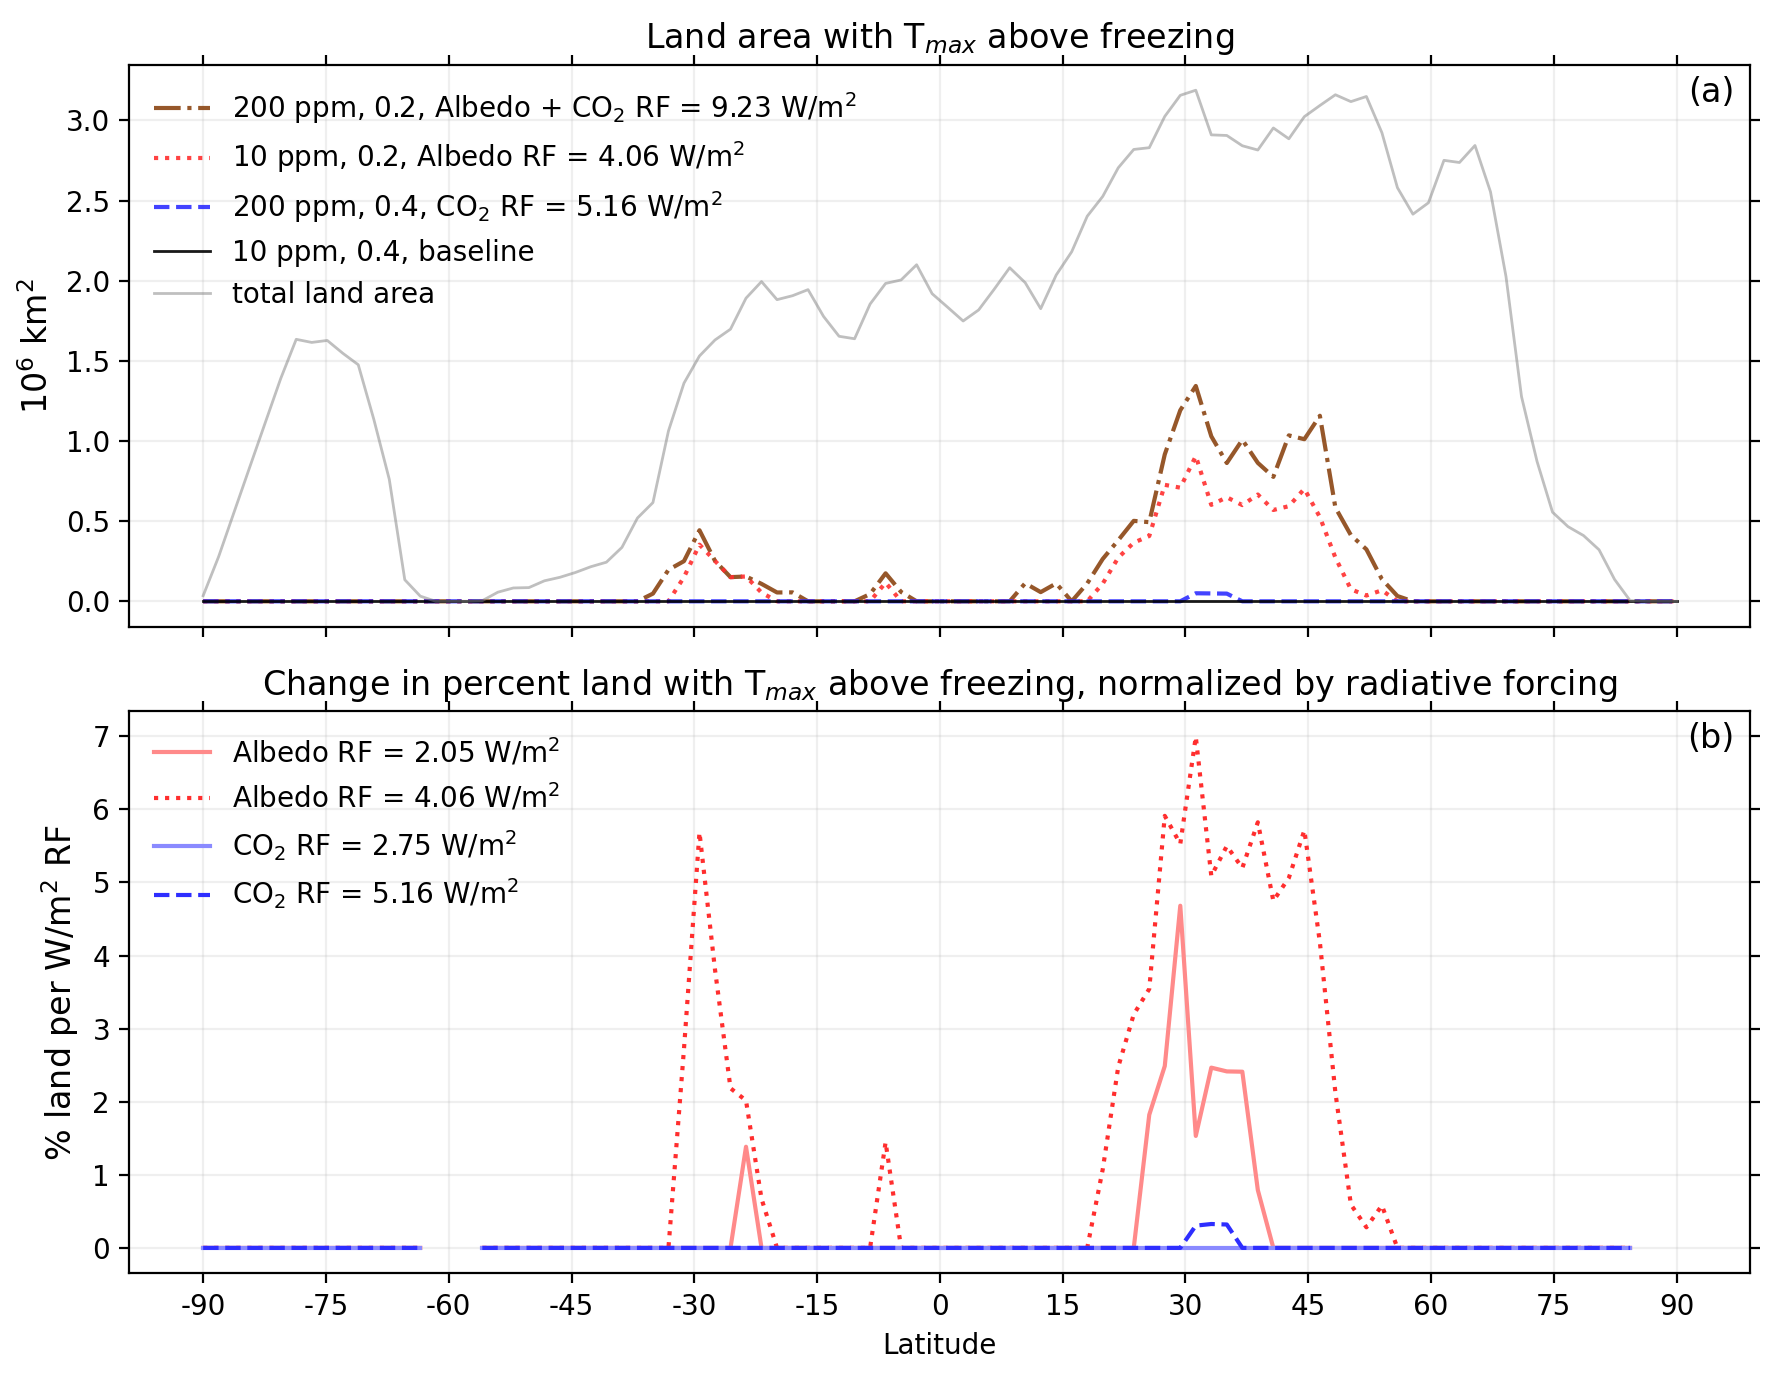

In [77]:
# combine these plots:

fig, (ax1, ax2) = plt.subplots(2,1, 
                               figsize = (9,7), 
                               sharex=True, dpi = 200)

### subplot a: land above freezing

a02_c200_warmland.plot(ax=ax1, x='lat', alpha=0.9, lw=1.5, ls='dashdot', 
                       color=run_color['moderncam4b_200p10p30a'], 
                       label=run_name_fig2a['moderncam4b_200p10p30a'])
a02_c010_warmland.plot(ax=ax1, x='lat', alpha=0.9, lw=1.5, ls='dotted', 
                       color=run_color['moderncam4b_010p10p30a'], 
                       label=run_name_fig2a['moderncam4b_010p10p30a'])
a04_c200_warmland.plot(ax=ax1, x='lat', alpha=0.9, lw=1.5, ls='dashed', 
                       color=run_color['moderncam4b_200p30p50a'], 
                       label=run_name_fig2a['moderncam4b_200p30p50a'])
a04_c010_warmland.plot(ax=ax1, x='lat', alpha=0.9, lw=1, ls='solid', 
                       color='k',label=run_name_fig2a['moderncam4b_010p30p50a'])
totalland.plot(ax = ax1, x = 'lat',  alpha = 0.5, lw = 1, color = 'grey',label = 'total land area',)


# subplot b: land above freezing normalized by radiative forcing

# a02_c200_warmland_normalized.plot(ax=ax2, x='lat', alpha=1, lw = 1.5, ls = 'dashdot', 
#                                   color = run_color['200co2_0.1alb_91tsi_bl99'],
#                                   label = run_name_fig2b['200co2_0.1alb_91tsi_bl99'],)
a03_c010_warmland_normalized.plot(ax=ax2, x='lat', alpha=1, lw = 1.5, ls = 'solid', 
                                  color = run_color['moderncam4b_010p20p40a'],
                                  label = run_name_fig2b['moderncam4b_010p20p40a'],)
a02_c010_warmland_normalized.plot(ax=ax2, x='lat', alpha=1, lw = 1.5, ls = 'dotted', 
                                  color = run_color['moderncam4b_010p10p30a'],
                                  label = run_name_fig2b['moderncam4b_010p10p30a'],)
a04_c050_warmland_normalized.plot(ax=ax2, x='lat', alpha=1, lw = 1.5, ls = 'solid', 
                                  color = run_color['moderncam4b_050p30p50a'],
                                  label = run_name_fig2b['moderncam4b_050p30p50a'],)
a04_c200_warmland_normalized.plot(ax=ax2, x='lat', alpha=1, lw = 1.5, ls = 'dashed', 
                                  color = run_color['moderncam4b_200p30p50a'],
                                  label = run_name_fig2b['moderncam4b_200p30p50a'],)

ax1.set_xticks(np.round(np.linspace(-90,90,13),1))
ax1.set_xticklabels((np.linspace(-90,90,13)).astype(int))
ax1.set_xlabel(None)
ax1.set_ylabel(r'$10^6$ km$^2$',fontsize=12)
ax1.set_title('')

ax1.text(.99, .98, 
        '(a)', ha='right', va='top', 
        transform=ax1.transAxes, fontsize=12)

ax2.set_xticks(np.round(np.linspace(-90,90,13),1))
ax2.set_xticklabels((np.linspace(-90,90,13)).astype(int))
ax2.set_ylabel(r'% land per W/m$^2$ RF',fontsize=12)
# ax2.set_ylim([-2,35])

ax1.set_title('Land area with T$_{max}$ above freezing', fontsize = 12)
ax2.set_title('Change in percent land with T$_{max}$ above freezing, normalized by radiative forcing', fontsize = 12)

ax2.text(.99, .98, 
        '(b)', ha='right', va='top', 
        transform=ax2.transAxes, fontsize=12)
# Add ticks on all sides of the box
ax1.tick_params(axis='both', which='both', direction='out', bottom=True, top=True, left=True, right=True)
ax2.tick_params(axis='both', which='both', direction='out', bottom=True, top=True, left=True, right=True)

# ax1.legend(loc=[1.01,0])
# ax2.legend(loc=[1.01,0])
ax2.set_xlabel('Latitude')
ax1.legend(loc='upper left',frameon=False)
ax2.legend(loc='upper left',frameon=False)
# plt.legend(loc=[-.5,0])

ax1.grid(True,alpha=0.2, zorder=0)
ax2.grid(True,alpha=0.2, zorder=0)

plt.tight_layout()

# Save the combined plot
filepath = 'JGRfigures/Fig3_combined'
fig.savefig(filepath + '.png', dpi=300, facecolor=None, edgecolor=None, bbox_inches='tight', transparent=True, pad_inches=0.01)

# Show the combined plot
plt.show()
plt.close()


In [ ]:
print(a04_c050_warmland_normalized.values)

print(a04_c050_warmland.values)

# Table 2

### Planetary Albedo

In [72]:
def calculate_planetary_albedo(run):
    # albedo = (ds_atm[run]['FSUTOA']/ds_atm[run]['SOLIN'])

    FSUTOA_total = (ds_atm[run]['FSUTOA']*area_grid).sum(dim=['lat','lon'])/area_grid.sum(dim=['lat','lon'])
    SOLIN_total = (ds_atm[run]['SOLIN']*area_grid).sum(dim=['lat','lon'])/area_grid.sum(dim=['lat','lon'])


    # FSUTOA_weighted = ds_atm[run]['FSUTOA']*np.cos(np.deg2rad(ds_atm[run]['FSUTOA'].lat))
    # SOLIN_weighted = ds_atm[run]['SOLIN']*np.cos(np.deg2rad(ds_atm[run]['FSUTOA'].lat))
    # # FSUTOA_weighted = (ds_atm[run]['FSUTOA']*area_grid)/(area_grid.sum('lat').sum('lon'))
    # # SOLIN_weighted = (ds_atm[run]['SOLIN']*area_grid)/(area_grid.sum('lat').sum('lon'))
    # FSUTOA_total = FSUTOA_weighted.sum('lat').sum('lon')
    # SOLIN_total = SOLIN_weighted.sum('lat').sum('lon')
    
    albedo_weighted_mean = (FSUTOA_total/SOLIN_total).mean('time').values
    return albedo_weighted_mean

In [73]:
# Global average planetary albedo (using gw weights)
albedo_column={}
for run in runlist:
    albedo_column[run]=calculate_planetary_albedo(run)
    print(run_name[run], ':', albedo_column[run])
    

10 ppm, 0.1/0.3 albedo : 0.6610976965773918
10 ppm, 0.2/0.4 albedo : 0.6735697444643309
10 ppm, 0.3/0.5 albedo : 0.6854816255511836
25 ppm, 0.2/0.4 albedo : 0.6723534421371654
50 ppm, 0.1/0.3 albedo : 0.6586290300374847
50 ppm, 0.15/0.35 albedo : 0.6651328827916511
50 ppm, 0.2/0.4 albedo : 0.6713038251262606
50 ppm, 0.25/0.45 albedo : 0.6774217937895171
50 ppm, 0.3/0.5 albedo : 0.6833594988288074
100 ppm, 0.2/0.4 albedo : 0.6704070033129832
200 ppm, 0.1/0.3 albedo : 0.6567528033362783
200 ppm, 0.2/0.4 albedo : 0.6696297803093114
200 ppm, 0.3/0.5 albedo : 0.681716346280496


In [74]:
# make into pandas dataframe, then save to csv

albedo_df=pd.DataFrame({'albedo_column':pd.Series(albedo_column)})

albedo_df.to_csv('JGRfigures/albedo_column.csv')

### Global mean surface temperature

In [75]:
def calculate_GMST(run):
    TS = ds_atm[run]['TS']
    
    # weights = ds_atm[run]['gw'][0]/2
    # TS_weighted = TS.weighted(weights)
    # TS_weighted_mean = TS_weighted.mean(("lon", "lat")).mean('time').values

    TS_weighted_mean = ((TS*area_grid).sum(("lon", "lat")).mean('time')/area_grid.sum(dim=['lat','lon'])).values

    return TS_weighted_mean

In [76]:
# Global average TS (using gw weights)
GMST_column={}
for run in runlist:
    GMST_column[run]= calculate_GMST(run)-273.15
    print(run_name[run], ':', GMST_column[run])
    

10 ppm, 0.1/0.3 albedo : -64.35500119764492
10 ppm, 0.2/0.4 albedo : -66.6943343201726
10 ppm, 0.3/0.5 albedo : -68.95817224176167
25 ppm, 0.2/0.4 albedo : -65.97556174898796
50 ppm, 0.1/0.3 albedo : -62.8967815688716
50 ppm, 0.15/0.35 albedo : -64.14247197342561
50 ppm, 0.2/0.4 albedo : -65.3410347559649
50 ppm, 0.25/0.45 albedo : -66.5357525199999
50 ppm, 0.3/0.5 albedo : -67.6933885293916
100 ppm, 0.2/0.4 albedo : -64.66963290005907
200 ppm, 0.1/0.3 albedo : -61.41834008408077
200 ppm, 0.2/0.4 albedo : -63.96122583508469
200 ppm, 0.3/0.5 albedo : -66.37384999927889


In [77]:
# make into pandas dataframe, then save to csv

GMST_df=pd.DataFrame({'GMST_column':pd.Series(GMST_column)})

GMST_df.to_csv('JGRfigures/GMST_column.csv')

### Radiative Forcing

In [78]:
# we made a dataarray of radiative forcing above
# called rf

RF_column=rf


# make into pandas dataframe, then save to csv

RF_df=pd.DataFrame({'RF_column':pd.Series(RF_column)})

RF_df.to_csv('JGRfigures/RF_column.csv')

### Change in percent land area reaching above freezing [%]

In [79]:
def percent_landarea_above_freezing_max(run):
    land = area_grid*gridcell_area['LANDFRAC'][0]
    land_warm = land.where(ds_atm[run]['TSMX'].groupby(ds_atm[run]['TSMX'].time.dt.year).max('time').mean('year') > 271.15)
    percent = area_grid.where(land_warm>0,0).sum('lon').sum('lat')/land.sum('lat').sum('lon')*100
    return percent

def percent_oceanarea_above_freezing_max(run):
    ocean = area_grid*(1-gridcell_area['LANDFRAC'][0])
    ocean_warm = ocean.where(ds_atm[run]['TSMX'].groupby(ds_atm[run]['TSMX'].time.dt.year).max('time').mean('year') > 271.15)
    percent = area_grid.where(ocean_warm>0,0).sum('lat').sum('lon')/ocean.sum('lat').sum('lon')*100
    return percent


In [80]:
# calculate percent land area above freezing during warmest month:
tmaxland_column={}
for run in runlist:
    tmaxland_column[run]=percent_landarea_above_freezing_max(run).values
    print(run_name[run], ':', tmaxland_column[run])
    # print(run, ':', np.round(percent_landarea_above_freezing_max(run).values,2))

10 ppm, 0.1/0.3 albedo : 7.049737380867412
10 ppm, 0.2/0.4 albedo : 0.8053719992971174
10 ppm, 0.3/0.5 albedo : 0.0
25 ppm, 0.2/0.4 albedo : 1.1052014978690081
50 ppm, 0.1/0.3 albedo : 9.791642061058658
50 ppm, 0.15/0.35 albedo : 4.388317942088977
50 ppm, 0.2/0.4 albedo : 1.6523711045241867
50 ppm, 0.25/0.45 albedo : 0.4040220165487305
50 ppm, 0.3/0.5 albedo : 0.0
100 ppm, 0.2/0.4 albedo : 1.9510576920751657
200 ppm, 0.1/0.3 albedo : 11.97034040417018
200 ppm, 0.2/0.4 albedo : 2.469794304955303
200 ppm, 0.3/0.5 albedo : 0.09880671960720135


In [81]:
# make into pandas dataframe, then save to csv

tmaxland_df=pd.DataFrame({'tmaxland_column':pd.Series(tmaxland_column)})

tmaxland_df.to_csv('JGRfigures/tmaxland_column.csv')

In [82]:
# calculate percent ocean area above freezing during warmest month:
tmaxocean_column={}
for run in runlist:
    tmaxocean_column[run]=percent_oceanarea_above_freezing_max(run).values
    print(run_name[run], ':', tmaxocean_column[run])

10 ppm, 0.1/0.3 albedo : 0.6028846926166759
10 ppm, 0.2/0.4 albedo : 0.028511323212282044
10 ppm, 0.3/0.5 albedo : 0.0
25 ppm, 0.2/0.4 albedo : 0.09590926814870111
50 ppm, 0.1/0.3 albedo : 0.8311411659439188
50 ppm, 0.15/0.35 albedo : 0.38019081386014697
50 ppm, 0.2/0.4 albedo : 0.14830566187120656
50 ppm, 0.25/0.45 albedo : 0.028511323212282044
50 ppm, 0.3/0.5 albedo : 0.0
100 ppm, 0.2/0.4 albedo : 0.16157681837658414
200 ppm, 0.1/0.3 albedo : 1.1332878418651244
200 ppm, 0.2/0.4 albedo : 0.24351214587326986
200 ppm, 0.3/0.5 albedo : 0.0


In [83]:
# make into pandas dataframe, then save to csv

tmaxocean_df=pd.DataFrame({'tmaxocean_column':pd.Series(tmaxocean_column)})

tmaxocean_df.to_csv('JGRfigures/tmaxocean_column.csv')

### land area with PE>P and Tmax>2C

In [57]:
# PET Calculation:
land_area_map = (area_grid*ds_atm[run]['LANDFRAC'][0])
total_land_area = ((area_grid*ds_atm[run]['LANDFRAC'][0]).sum(dim=['lat','lon'])).values
print('dry warm land percent')

dry_land_percent_column={}
dry_warm_land_percent_column={}

Lv = 2260 # J/g
# Ls = 2830 # J/g
Ls = 2848
# Latent_heat = Lv
gperkg = 1000 # or JperkJ
mmperm = 1000
sperday = 60*60*24
dperyear = 365
rhoice = 900
rhowater = 1000

for run in runlist:
    # P = (ds_atm[run]['PRECC']+ds_atm[run]['PRECL']).groupby(ds_atm[run]['PRECL'].time.dt.year).mean('time')* mmperm * sperday
    # # E = ((ds_atm[run]['LHFLX']/Lv).where(ds_atm[run]['TS'] > 273.15, (ds_atm[run]['LHFLX']/Ls))/gperkg).groupby(ds_atm[run]['LHFLX'].time.dt.year).mean('time') * sperday* rhoice/rhowater
    # PET = PETcalc(run, Lv).where(ds_atm[run]['TS'].mean('time') > 273.15, PETcalc(run, Ls))

    PET = PETcalc(run, Lv).where(ds_atm[run]['TS'].mean('time') > 273.15, PETcalc(run, Ls))
    P = (ds_atm[run]['PRECC']+ds_atm[run]['PRECL']).groupby(ds_atm[run]['PRECL'].time.dt.year).mean('time')* mmperm * sperday # mm/da

    dry = xr.where(((PET-P)>0).mean('year'),land_area_map,0)#np.nan)
    dry_warm = dry.where(ds_atm[run]['TSMX'].groupby(ds_atm[run]['TSMX'].time.dt.year).max('time').mean('year') > 271.15)
    dry_warm_land = dry_warm.where(ds_atm[run]['LANDFRAC'][0]>0) #subset to land area
    dry_warm_land_area = area_grid.where(dry_warm_land>0,0)

    # save global areas
    dry_land_percent_column[run]=100*(dry.sum('lat').sum('lon')/total_land_area).values
    dry_warm_land_percent_column[run]=100*(dry_warm_land_area.sum('lat').sum('lon')/total_land_area).values
    print(run_name[run],' dry : ',dry_land_percent_column[run])
    print(run_name[run],' dry and warm: ',dry_warm_land_percent_column[run])


        # # PET Calculation:
        # PET = PETcalc(run, Lv).where(ds_atm[run]['TS'].mean('time') > 273.15, PETcalc(run, Ls))
        # P = (ds_atm[run]['PRECC']+ds_atm[run]['PRECL']).groupby(ds_atm[run]['PRECL'].time.dt.year).mean('time')* mmperm * sperday # mm/da
        # # E = (((ds_atm[run]['LHFLX']/(Lv*gperkg)).where(ds_atm[run]['TS'] > 273.15, (ds_atm[run]['LHFLX']/(Ls*gperkg)))).mean('time') * sperday )  #mm/d
        # E = ((ds_atm[run]['LHFLX']/(Ls*gperkg)).mean('time'))*sperday  #W/m2
        # mapdata = pi, (E - P).mean('year').where(ds_atm[run]['LANDFRAC'].mean('time') < 1, (PET - P).mean('year'))


dry warm land percent
calculating PET
calculating PET
10 ppm, 0.1/0.3 albedo  dry :  78.10301966214719
10 ppm, 0.1/0.3 albedo  dry and warm:  7.049737380867412
calculating PET
calculating PET
10 ppm, 0.2/0.4 albedo  dry :  72.73883974747713
10 ppm, 0.2/0.4 albedo  dry and warm:  0.8053719992971174
calculating PET
calculating PET
10 ppm, 0.3/0.5 albedo  dry :  65.06176435181445
10 ppm, 0.3/0.5 albedo  dry and warm:  0.0
calculating PET
calculating PET
25 ppm, 0.2/0.4 albedo  dry :  73.80004056532789
25 ppm, 0.2/0.4 albedo  dry and warm:  1.1052014978690081
calculating PET
calculating PET
50 ppm, 0.1/0.3 albedo  dry :  79.27591151941851
50 ppm, 0.1/0.3 albedo  dry and warm:  9.79164206105866
calculating PET
calculating PET
50 ppm, 0.15/0.35 albedo  dry :  77.51515873475802
50 ppm, 0.15/0.35 albedo  dry and warm:  4.388317942088977
calculating PET
calculating PET
50 ppm, 0.2/0.4 albedo  dry :  74.69277694216214
50 ppm, 0.2/0.4 albedo  dry and warm:  1.6523711045241862
calculating PET
calc

In [58]:
# make into pandas dataframe, then save to csv

dry_land_percent_df=pd.DataFrame({'dry_land_percent_column':pd.Series(dry_land_percent_column)})

dry_land_percent_df.to_csv('JGRfigures/dry_land_percent_column.csv')

# make into pandas dataframe, then save to csv

dry_warm_land_percent_df=pd.DataFrame({'dry_warm_land_percent_column':pd.Series(dry_warm_land_percent_column)})

dry_warm_land_percent_df.to_csv('JGRfigures/dry_warm_land_percent_column.csv')

### Assemble table

columns are :  
broadband,  
vis/nir,  
CO2,   
albedo,  
GMST,  
rf,  
land>-2C,  
land PE>P,  
land both, 
ocean>-2C


In [15]:
# Make dictionary for run names

co2_column = {}
co2_column = {
    'moderncam4b_010p10p30a' : '10',
    'moderncam4b_010p20p40a' : '10',
    'moderncam4b_010p30p50a' : '10',

    'moderncam4b_025p20p40a' : '25',

    'moderncam4b_050p10p30a' : '50',
    'moderncam4b_050p15p35a' : '50',
    'moderncam4b_050p20p40a' : '50',
    'moderncam4b_050p25p45a' : '50',
    'moderncam4b_050p30p50a' : '50',

    'moderncam4b_100p20p40a' : '100',
    'moderncam4b_100p30p50a' : '100',

    'moderncam4b_200p10p30a' : '200',
    'moderncam4b_200p20p40a' : '200',
    'moderncam4b_200p30p50a' : '200',
}

In [22]:
co2_column

{'moderncam4b_010p10p30a': '10',
 'moderncam4b_010p20p40a': '10',
 'moderncam4b_010p30p50a': '10',
 'moderncam4b_025p20p40a': '25',
 'moderncam4b_050p10p30a': '50',
 'moderncam4b_050p15p35a': '50',
 'moderncam4b_050p20p40a': '50',
 'moderncam4b_050p25p45a': '50',
 'moderncam4b_050p30p50a': '50',
 'moderncam4b_100p20p40a': '100',
 'moderncam4b_100p30p50a': '100',
 'moderncam4b_200p10p30a': '200',
 'moderncam4b_200p20p40a': '200',
 'moderncam4b_200p30p50a': '200'}

In [16]:
# Make dictionary for run names

albedoname_column = {}
albedoname_column = {
    'moderncam4b_010p10p30a' : '0.1/0.3',
    'moderncam4b_010p20p40a' : '0.2/0.4',
    'moderncam4b_010p30p50a' : '0.3/0.5',

    'moderncam4b_025p20p40a' : '0.2/0.4',

    'moderncam4b_050p10p30a' : '0.1/0.3',
    'moderncam4b_050p15p35a' : '0.15/0.35',
    'moderncam4b_050p20p40a' : '0.2/0.4',
    'moderncam4b_050p25p45a' : '0.25/0.45',
    'moderncam4b_050p30p50a' : '0.3/0.5',

    'moderncam4b_100p20p40a' : '0.2/0.4',
    'moderncam4b_100p30p50a' : '0.3/0.5',

    'moderncam4b_200p10p30a' : '0.1/0.3',
    'moderncam4b_200p20p40a' : '0.2/0.4',
    'moderncam4b_200p30p50a' : '0.3/0.5',
}

In [17]:
# Make dictionary for run names

broadband_column = {}
broadband_column = {
    'moderncam4b_010p10p30a' : '0.2',
    'moderncam4b_010p20p40a' : '0.3',
    'moderncam4b_010p30p50a' : '0.4',

    'moderncam4b_025p20p40a' : '0.3',

    'moderncam4b_050p10p30a' : '0.2',
    'moderncam4b_050p15p35a' : '0.25',
    'moderncam4b_050p20p40a' : '0.3',
    'moderncam4b_050p25p45a' : '0.35',
    'moderncam4b_050p30p50a' : '0.4',

    'moderncam4b_100p20p40a' : '0.3',
    'moderncam4b_100p30p50a' : '0.4',

    'moderncam4b_200p10p30a' : '0.2',
    'moderncam4b_200p20p40a' : '0.3',
    'moderncam4b_200p30p50a' : '0.4',
}

In [55]:
# option to load the columns from data (if not already in memory)
load_columns_from_data=1

file_list=['JGRfigures/albedo_column.csv',
           'JGRfigures/GMST_column.csv',
           'JGRfigures/RF_column.csv',
           'JGRfigures/tmaxland_column.csv',
           'JGRfigures/dry_land_percent_column.csv',
           'JGRfigures/dry_warm_land_percent_column.csv',
           'JGRfigures/tmaxocean_column.csv']
           

In [57]:
# merge dictionaries into a pandas dataframe


if load_columns_from_data==1:
    data_df = pd.concat(
        [pd.read_csv(f, index_col=0) for f in file_list],
        axis=1
    )

    # rename the data columns
    data_df.rename(columns={
                            'albedo_column':'Global average planetary albedo',
                            'GMST_column':'Global mean surface temperature (C)',
                            'RF_column':'Radiative forcing (W m-2) relative to 10ppm, albedo 0.4',
                            'tmaxland_column':'Percent of land area with Tmax>-2C in warmest month',
                            'dry_land_percent_column':'Percent of land area with PE>P in annual mean',
                            'dry_warm_land_percent_column':'Percent of land area with PE>P and Tmax>-2C',
                            'tmaxocean_column':'Percent of ocean area with PE>P and Tmax>-2C'                     
                            }, inplace=True)
    
    text_columns=pd.DataFrame({'Broadband solar':pd.Series(broadband_column),
                           'Visible/near-IR':pd.Series(albedoname_column),
                           'CO2 (ppm)':pd.Series(co2_column)})
    
    merged_table = pd.concat([text_columns, data_df], axis=1)


else: # already in memory
    merged_table=pd.DataFrame({'Broadband solar':pd.Series(broadband_column),
                           'Visible/near-IR':pd.Series(albedoname_column),
                           'CO2 (ppm)':pd.Series(co2_column),
                           'Global average planetary albedo':pd.Series(albedo_column),
                           'Global mean surface temperature (C)':pd.Series(GMST_column),
                           'Radiative forcing (W m-2) relative to 10ppm, albedo 0.4':pd.Series(RF_column),
                           'Percent of land area with Tmax>-2C in warmest month':pd.Series(tmaxland_column),
                           'Percent of land area with PE>P in annual mean':pd.Series(dry_land_percent_column),
                           'Percent of land area with PE>P and Tmax>-2C':pd.Series(dry_warm_land_percent_column),
                           'Percent of ocean area with PE>P and Tmax>-2C':pd.Series(tmaxocean_column)                     
                          })


In [58]:
merged_table

,Broadband solar,Visible/near-IR,CO2 (ppm),Global average planetary albedo,Global mean surface temperature (C),"Radiative forcing (W m-2) relative to 10ppm, albedo 0.4",Percent of land area with Tmax>-2C in warmest month,Percent of land area with PE>P in annual mean,Percent of land area with PE>P and Tmax>-2C,Percent of ocean area with PE>P and Tmax>-2C
moderncam4b_010p10p30a,0.2,0.1/0.3,10,0.661098,-64.355001,4.063010,7.049737,78.103020,7.049737,0.602885
moderncam4b_010p20p40a,0.3,0.2/0.4,10,0.673570,-66.694334,2.051821,0.805372,72.738840,0.805372,0.028511
moderncam4b_010p30p50a,0.4,0.3/0.5,10,0.685482,-68.958172,0.000000,0.000000,65.061764,0.000000,0.000000
moderncam4b_025p20p40a,0.3,0.2/0.4,25,0.672353,-65.975562,3.598809,1.105201,73.800041,1.105201,0.095909
moderncam4b_050p10p30a,0.2,0.1/0.3,50,0.658629,-62.896782,6.814683,9.791642,79.275912,9.791642,0.831141
moderncam4b_050p15p35a,0.25,0.15/0.35,50,0.665133,-64.142472,5.814007,4.388318,77.515159,4.388318,0.380191
moderncam4b_050p20p40a,0.3,0.2/0.4,50,0.671304,-65.341035,4.803493,1.652371,74.692777,1.652371,0.148306
moderncam4b_050p25p45a,0.35,0.25/0.45,50,0.677422,-66.535753,3.782826,0.404022,72.161468,0.404022,0.028511
moderncam4b_050p30p50a,0.4,0.3/0.5,50,0.683359,-67.693389,2.751672,0.000000,67.572821,0.000000,0.000000
moderncam4b_100p20p40a,0.3,0.2/0.4,100,0.670407,-64.669633,5.993722,1.951058,75.925699,1.951058,0.161577


In [59]:
merged_table.to_csv('JGRfigures/merged_table.csv')

In [60]:
merged_table

,Broadband solar,Visible/near-IR,CO2 (ppm),Global average planetary albedo,Global mean surface temperature (C),"Radiative forcing (W m-2) relative to 10ppm, albedo 0.4",Percent of land area with Tmax>-2C in warmest month,Percent of land area with PE>P in annual mean,Percent of land area with PE>P and Tmax>-2C,Percent of ocean area with PE>P and Tmax>-2C
moderncam4b_010p10p30a,0.2,0.1/0.3,10,0.661098,-64.355001,4.063010,7.049737,78.103020,7.049737,0.602885
moderncam4b_010p20p40a,0.3,0.2/0.4,10,0.673570,-66.694334,2.051821,0.805372,72.738840,0.805372,0.028511
moderncam4b_010p30p50a,0.4,0.3/0.5,10,0.685482,-68.958172,0.000000,0.000000,65.061764,0.000000,0.000000
moderncam4b_025p20p40a,0.3,0.2/0.4,25,0.672353,-65.975562,3.598809,1.105201,73.800041,1.105201,0.095909
moderncam4b_050p10p30a,0.2,0.1/0.3,50,0.658629,-62.896782,6.814683,9.791642,79.275912,9.791642,0.831141
moderncam4b_050p15p35a,0.25,0.15/0.35,50,0.665133,-64.142472,5.814007,4.388318,77.515159,4.388318,0.380191
moderncam4b_050p20p40a,0.3,0.2/0.4,50,0.671304,-65.341035,4.803493,1.652371,74.692777,1.652371,0.148306
moderncam4b_050p25p45a,0.35,0.25/0.45,50,0.677422,-66.535753,3.782826,0.404022,72.161468,0.404022,0.028511
moderncam4b_050p30p50a,0.4,0.3/0.5,50,0.683359,-67.693389,2.751672,0.000000,67.572821,0.000000,0.000000
moderncam4b_100p20p40a,0.3,0.2/0.4,100,0.670407,-64.669633,5.993722,1.951058,75.925699,1.951058,0.161577


In [61]:
# how to retrieve one row using run name
merged_table.loc[['moderncam4b_200p30p50a']]

,Broadband solar,Visible/near-IR,CO2 (ppm),Global average planetary albedo,Global mean surface temperature (C),"Radiative forcing (W m-2) relative to 10ppm, albedo 0.4",Percent of land area with Tmax>-2C in warmest month,Percent of land area with PE>P in annual mean,Percent of land area with PE>P and Tmax>-2C,Percent of ocean area with PE>P and Tmax>-2C
moderncam4b_200p30p50a,0.4,0.3/0.5,200,0.681716,-66.37385,5.162031,0.098807,71.072053,0.098807,0.0


In [62]:
printrunlist=['moderncam4b_010p30p50a',
              'moderncam4b_050p30p50a',
              'moderncam4b_200p30p50a',
              'moderncam4b_050p25p45a',
              'moderncam4b_010p20p40a',
              'moderncam4b_025p20p40a',
              'moderncam4b_050p20p40a',
              'moderncam4b_100p20p40a',
              'moderncam4b_200p20p40a',
              'moderncam4b_050p15p35a',
              'moderncam4b_010p10p30a',
              'moderncam4b_050p10p30a',
              'moderncam4b_200p10p30a']


# 0.4	0.3/0.5	10
# 0.4	0.3/0.5	50
# 0.4	0.3/0.5	200
# 0.35	0.25/0.45	50
# 0.3	0.2/0.4	10
# 0.3	0.2/0.4	25
# 0.3	0.2/0.4	50
# 0.3	0.2/0.4	100
# 0.3	0.2/0.4	200
# 0.25	0.15/0.35	50
# 0.2	0.1/0.3	10
# 0.2	0.1/0.3	50
# 0.2	0.1/0.3	200


In [65]:
merged_table_print=merged_table.loc[printrunlist]

merged_table_print.to_csv('JGRfigures/merged_table_print.csv')

In [66]:
merged_table_print

,Broadband solar,Visible/near-IR,CO2 (ppm),Global average planetary albedo,Global mean surface temperature (C),"Radiative forcing (W m-2) relative to 10ppm, albedo 0.4",Percent of land area with Tmax>-2C in warmest month,Percent of land area with PE>P in annual mean,Percent of land area with PE>P and Tmax>-2C,Percent of ocean area with PE>P and Tmax>-2C
moderncam4b_010p30p50a,0.4,0.3/0.5,10,0.685482,-68.958172,0.000000,0.000000,65.061764,0.000000,0.000000
moderncam4b_050p30p50a,0.4,0.3/0.5,50,0.683359,-67.693389,2.751672,0.000000,67.572821,0.000000,0.000000
moderncam4b_200p30p50a,0.4,0.3/0.5,200,0.681716,-66.373850,5.162031,0.098807,71.072053,0.098807,0.000000
moderncam4b_050p25p45a,0.35,0.25/0.45,50,0.677422,-66.535753,3.782826,0.404022,72.161468,0.404022,0.028511
moderncam4b_010p20p40a,0.3,0.2/0.4,10,0.673570,-66.694334,2.051821,0.805372,72.738840,0.805372,0.028511
moderncam4b_025p20p40a,0.3,0.2/0.4,25,0.672353,-65.975562,3.598809,1.105201,73.800041,1.105201,0.095909
moderncam4b_050p20p40a,0.3,0.2/0.4,50,0.671304,-65.341035,4.803493,1.652371,74.692777,1.652371,0.148306
moderncam4b_100p20p40a,0.3,0.2/0.4,100,0.670407,-64.669633,5.993722,1.951058,75.925699,1.951058,0.161577
moderncam4b_200p20p40a,0.3,0.2/0.4,200,0.669630,-63.961226,7.213852,2.469794,76.577261,2.469794,0.243512
moderncam4b_050p15p35a,0.25,0.15/0.35,50,0.665133,-64.142472,5.814007,4.388318,77.515159,4.388318,0.380191


# Other calculations

In [ ]:
def percent_landarea_above_freezing_mean(run):
    land = area_grid*gridcell_area['LANDFRAC'][0]
    land_warm = land.where(ds_atm[run]['TSMX'].mean('time') > 271.15)
    percent = area_grid.where(land_warm>0,0).sum('lon').sum('lat')/land.sum('lat').sum('lon')*100
    return percent

def percent_oceanarea_above_freezing_mean(run):
    ocean = area_grid*(1-gridcell_area['LANDFRAC'][0])
    ocean_warm = ocean.where(ds_atm[run]['TSMX'].mean('time') > 271.15)
    percent = area_grid.where(ocean_warm>0,0).sum('lat').sum('lon')/ocean.sum('lat').sum('lon')*100
    return percent

In [ ]:
# calculate percent land area above freezing on annual mean:
tmeanland_column={}
for run in runlist:
    tmeanland_column[run]=percent_landarea_above_freezing_mean(run).values
    print(run, ':', tmeanland_column[run])

In [ ]:
# calculate percent ocean area above freezing in annual mean:
tmeanocean_column={}
for run in runlist:
    tmeanocean_column[run]=percent_oceanarea_above_freezing_mean(run).values
    print(run, ':', tmeanocean_column[run])

#### greenhouse effect

Following Pierrehumbert 2005 (https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2004JD005162)
Let's calculate the Greenhouse Effect as G = σT^4 - OLR

In [ ]:
# fig = plt.figure(figsize = (8,5),dpi = 200,)
for run in ['moderncam4b_200p10p30a',
            'moderncam4b_200p30p50a',
            'moderncam4b_050p10p30a',
            'moderncam4b_050p30p50a',
            'moderncam4b_010p30p50a',
            'moderncam4b_010p20p40a',
            'moderncam4b_010p10p30a',
            ]:
    OLR = ds_atm[run]['FLUT'].mean('lon').mean('time').values
    Ts = ds_atm[run]['TS'].mean('lon').mean('time').values
    
    G = (5.67e-8)*(Ts**4) - OLR
    print(run, (G*np.cos(np.deg2rad(ds_atm[run]['lat']))).mean('lat').values)